# Autômatos Celulares

## Códigos

Primeiro, vamos reescrever o código da aula anterior. Mas vamos fazer uma pequena alteração, que vai ser útil mais para frente: Vamos implementar o código de condições de contorno periódicas usando o método das **células fantasma** (*ghost cells*).

Este método consiste em acrescentar células adicionais no começo e no final, que copiam os valors das células no extremo oposto. Por exemplo, se temos as $n$ células $1,2,\ldots,n$, acrescentamos células $1$ e $n+1$ e copiamos o valor da célula $0$ na célula $n+1$ e o valor da célula $n$ na célula $0$.

A vantagem é que a regra de atualização das células pode, depois que isso é feito, ser aplicada diretamente a todas as células $1,2,\ldots,n$.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def digits(n, b, m):
    """Computes the m least significant digits of n in base b."""
    alldigits = np.zeros(m, dtype=np.int)
    for i in range(m):
        alldigits[i] = n % b
        n //= b
    return alldigits

In [3]:
class Rule:
    # Initializa an np.array of int with the rule table
    def __init__(self, rule_code):
        """Creates a table for the rule given by rule_code"""
        self.table = digits(rule_code, 2, 8)
        self.neigh_delta = np.array([-1, 0, 1]) # Displacement to neighbours (including cell)
    
    def next_state(self, s):
        """s is the current value of s[i-1], s[i], s[i+1]. Lookup table for next state."""
        return self.table[s[0]*4+s[1]*2+s[2]]

In [4]:
def plot_evolution(evolution, ax=None):
    """Plots the time evolution of the states given in evolution.
    Input should have one time step per line and one cell per column.
    0 is ploted white; 1 is ploted black."""
    if ax is None:
        ax = plt.gca()
    ax.matshow(evolution, cmap='binary')
    ax.set_aspect('equal')
    ax.set_xticks([])
    ax.set_yticks([])

In [5]:
def init_perturbation(n, perturbation_state=1):
    """Inicializes an elementary cellular automaton with just one cell 1 in the centre."""
    res = np.zeros(n, dtype=np.int)
    res[n//2] = perturbation_state
    return res

In [6]:
def init_random(n, p):
    """Initializes an elementary cellular automaton with a probability p for each cell to be 1."""
    return (np.random.random(n) < p).astype(np.int)

Aqui criamos uma função para realizar a atualização das células fantasma num arranjo unidimensional:

In [7]:
def update_ghost_cells(vector):
    vector[0] = vector[-2] # First ghost cell is copy of last non-ghost cell
    vector[-1] = vector[1] # Last ghost cell is copy of first non-ghost cell

In [8]:
def evolve(rule, init, T):
    """Evolves the elementary automaton given by rule from the initial condition init for T time steps."""
    n = init.size
    # Create evolution array with space for ghost cells
    evolution = np.zeros((T+1, n+2), dtype=np.int)
    evolution[0, 1:-1] = init
    for t in range(T):
        update_ghost_cells(evolution[t, :])
        for i in range(1, n+1):
            evolution[t+1, i] = rule.next_state(evolution[t, i + rule.neigh_delta])
    return evolution[:, 1:-1]

## Comportamentos (continuação)

### "Aleatoriedade"

Algumas regras geram um comportamento que parece aleatório.

In [9]:
T = 100
s0_pert = init_perturbation(2 * T + 1)
s0_p1 = init_random(100, 0.1)
s0_p3 = init_random(100, 0.3)
s0_p5 = init_random(100, 0.5)

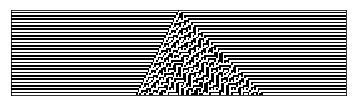

In [10]:
plot_evolution(evolve(Rule(75), s0_pert, 50))

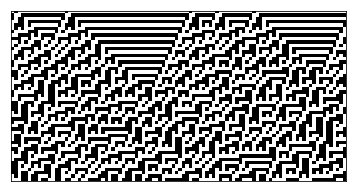

In [11]:
plot_evolution(evolve(Rule(75), s0_p1, 50))

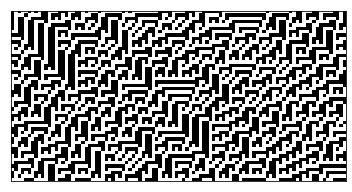

In [12]:
plot_evolution(evolve(Rule(75), s0_p3, 50))

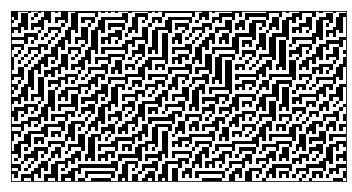

In [13]:
plot_evolution(evolve(Rule(75), s0_p5, 50))

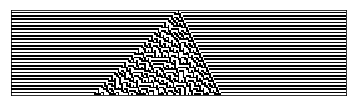

In [14]:
plot_evolution(evolve(Rule(101), s0_pert, 50))

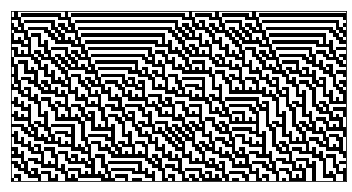

In [15]:
plot_evolution(evolve(Rule(101), s0_p1, 50))

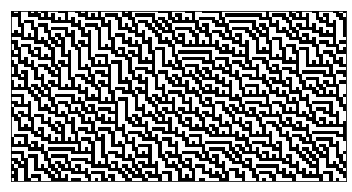

In [16]:
plot_evolution(evolve(Rule(101), s0_p3, 50))

### Comportamentos complexos

Por fim, algumas regras apresentam comportamentos que apresentam certas regularidades locais (não aparentam ser aleatórios) mas sem ser fractais ou repetitivos.

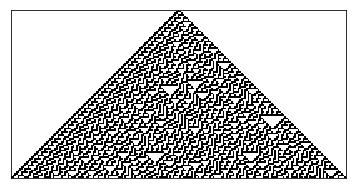

In [17]:
plot_evolution(evolve(Rule(30), s0_pert, 100))

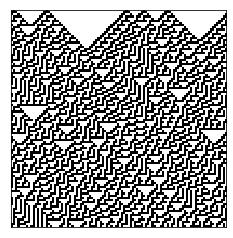

In [18]:
plot_evolution(evolve(Rule(30), s0_p1, 100))

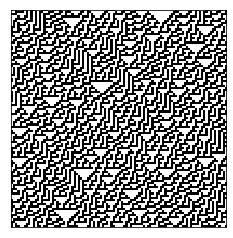

In [19]:
plot_evolution(evolve(Rule(30), s0_p3, 100))

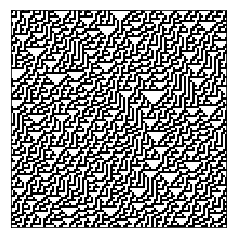

In [20]:
plot_evolution(evolve(Rule(30), s0_p5, 100))

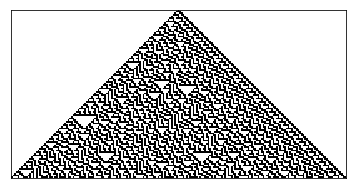

In [21]:
plot_evolution(evolve(Rule(86), s0_pert, 100))

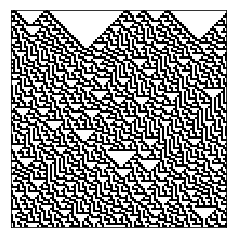

In [22]:
plot_evolution(evolve(Rule(86), s0_p1, 100))

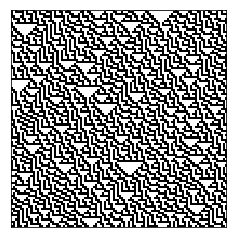

In [23]:
plot_evolution(evolve(Rule(86), s0_p3, 100))

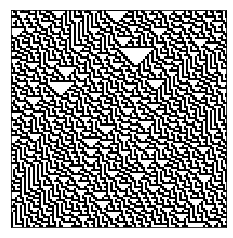

In [24]:
plot_evolution(evolve(Rule(86), s0_p5, 100))

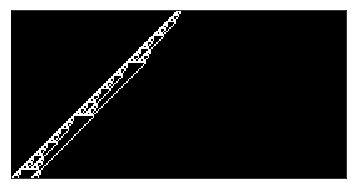

In [25]:
plot_evolution(evolve(Rule(169), s0_pert, 100))

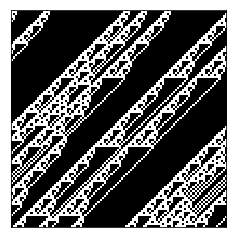

In [26]:
plot_evolution(evolve(Rule(169), s0_p1, 100))

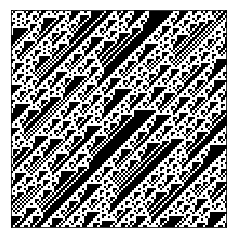

In [27]:
plot_evolution(evolve(Rule(169), s0_p3, 100))

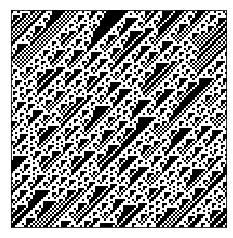

In [28]:
plot_evolution(evolve(Rule(169), s0_p5, 100))

## Periodicidade de automatos celulares

Num automato celular elementar com 2 estados possíveis para cada uma das $n$ células, o número total de estados possíveis para o sistema é de $2^n$.

Isso siginfica que o comportamento do autômato será necessáriamente periódico. Lembre-se que o autômato é completamente determinístico, isto é, a partir de um estado, sempre será produzido o mesmo estado posterior. Considere o que acontece no instante $t=2^n-1$. Neste instante, temos duas possibilidade (lembre-se que começamos com um estado $s(0)$ em $t=0$):

1. Ou o estado atual $s(2^n-1)$ é uma repetição de algum dos estados anteriores $s(\tau)$, e portanto já houve um ciclo com período de no máximo $2^n-1$, ou
2. O estado $2^n-1$ nunca havia sido produzido, isto é $s(2^n-1)\ne s(t), t=0,\ldots,2^n-2$.

Neste último caso, já foram percorridos $2^n$ estados distintos (de 0 a $2^n-1$), e portanto o novo estado $s(2^n)$ precisa necessariamente ser repetido.

Por isso, em geral dizemos que um autômato tem comportamento periódico apenas se o período é pequeno, isto é, não cresce com o número total de estados possíveis. A idéia é que a repetição ocorre pela própria dinâmica do autômato, e não pela limitação do número total de estados possíveis.

## As quatro classes de comportamento de Wolfram

Baseado nesses diferentes comportamentos, Wolfram criou uma classificação do comportamento de automatos celulares em quatro classes:

- **Classe 1** são os autômatos em que quase todas as condições iniciais levam ao mesmo estado final uniforme.
- **Classe 2** são os autômatos que produzem diferentes estados finais, mas as estruturas desses estados finais são simples ou repetidas (cíclicas) depois de poucos passos.
- **Classe 3** são autômatos com comportamento mais complicado e que aparenta aleatoriedade, mas com certas estruturas de pequena escala.
- **Classe 4** são autômatos que apresentam uma mistura de ordem e aleatoriedade, com estruturas locais que movem e interagem umas com as outras em padrões complicados.

## Regras totalísticas

Em diversas situações, é útil limitar as regras possíveis. Uma limitação geralmente usada é considerar apenas as chamadas **regras totalísticas**.

Uma regra é totalística se o novo estado depende apenas da soma dos valores da célula e de suas vizinhas, e não de onde os valores vêm (um estado na célula tem o mesmo efeito que esse mesmo estado na célula à esquerda ou à direita).

No caso dos autômatos elementares considerados até agora, onde o estado é 0 ou 1, isso significa que contamos o número de células ligadas entre a célula atual e suas duas vizinhas. Assim, temos apenas 4 resultados distintos possíveis: 0, 1, 2 ou 3. A tabela de uma dessas regras totalísticas será então da forma:

| Número de células ligadas | Novo estado |
|---------------------------|-------------|
| 0 | 0 |
| 1 | 1 |
| 2 | 1 |
| 3 | 0 |

Como temos 4 linhas na tabela e 2 valores possíveis para cada estado resultante, temos um total de $2^4=16$ regras totalísticas para estes autômatos.

Vamos indicar essas regras por $T_k$, onde $k$ é o número cuja representação binária $k=\sum_{i=0}^3 k_i 2^i$ tem entrada $k_i$ na tabela para número de células ligadas igual a $i$. Por exemplo, a tabela acima corresponde a $T_6$.

In [29]:
class TotalisticRule:
    def __init__(self, rule_code, ncells=3, nstates=2):
        """Creates a totalistic rule for ncells in the neigbourhood (including the cell)."""
        table_size = ncells * (nstates - 1) + 1
        self.table = digits(rule_code, nstates, table_size)
        self.neigh_delta = np.array([-1, 0, 1])

    def next_state(self, s):
        return self.table[np.sum(s)]

Vejamos o comportamento dessas regras com uma perturbação inicial.

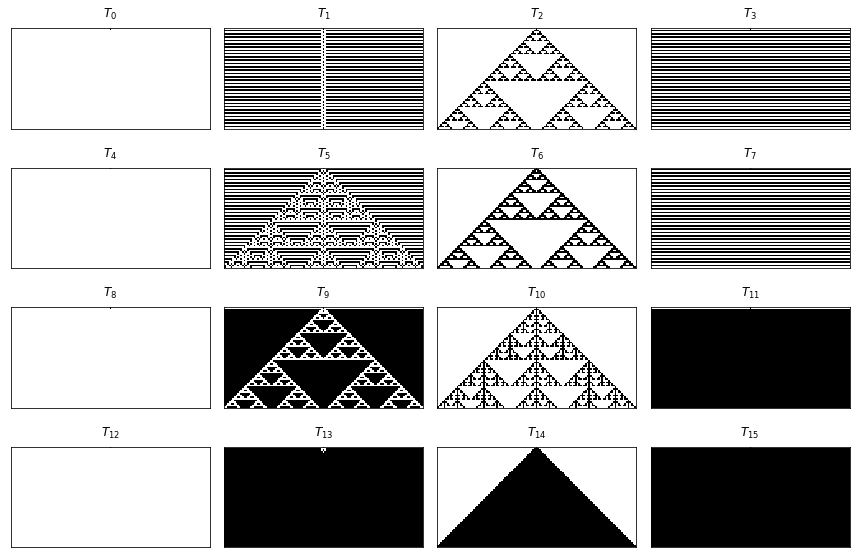

In [30]:
T = 60
n = 2 * T + 1
s0 = init_perturbation(n)
fig, ax = plt.subplots(4, 4)
fig.set_size_inches(12, 8)
for k in range(16):
    plot_evolution(evolve(TotalisticRule(k), s0, T), ax[k // 4, k % 4])
    ax[k // 4, k % 4].set_title(r'$T_{'+str(k)+r'}$')
plt.tight_layout()

Por curiosidade, vamos ver também o que acontece com uma perturbação 0 com todas as outras células 1.

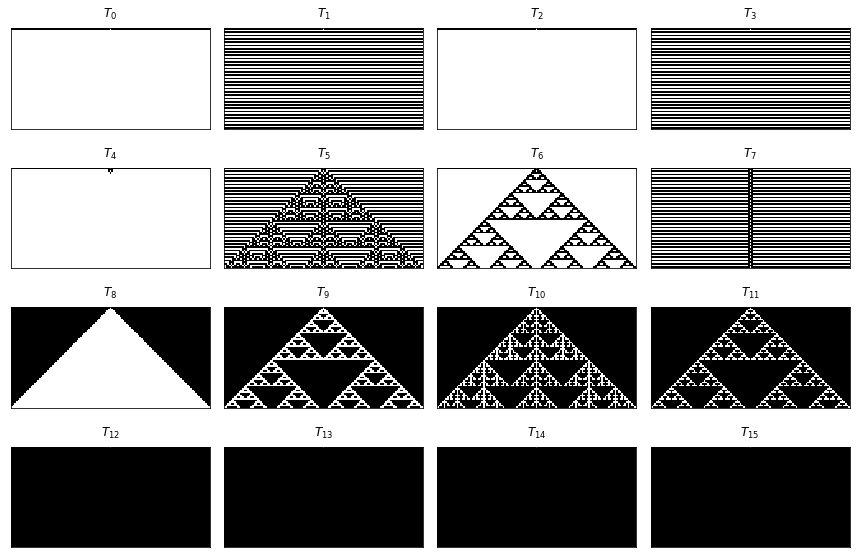

In [31]:
fig, ax = plt.subplots(4, 4)
fig.set_size_inches(12, 8)
for k in range(16):
    plot_evolution(evolve(TotalisticRule(k), 1 - s0, T), ax[k // 4, k % 4])
    ax[k // 4, k % 4].set_title(r'$T_{'+str(k)+r'}$')
plt.tight_layout()

E vejamos agora com estado inicial aleatório com $p=0.5$ de uma célula estar ligada.

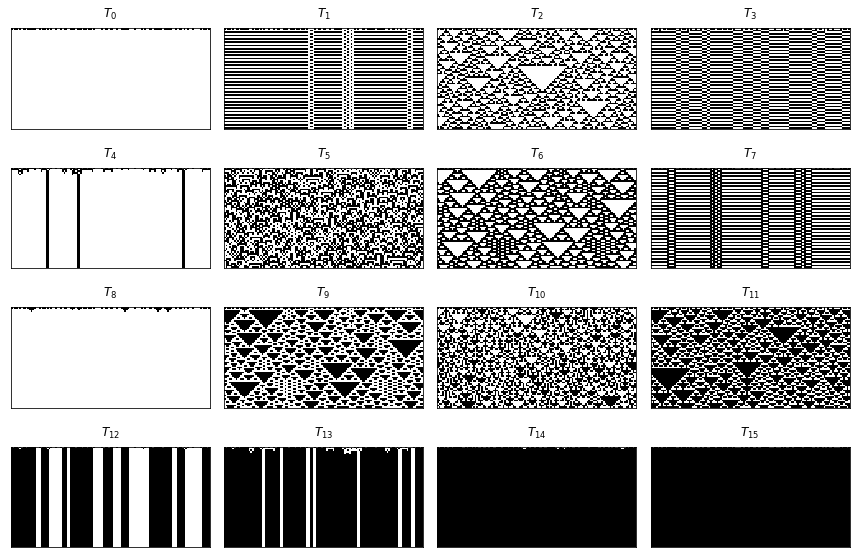

In [32]:
s0 = init_random(n, 0.5)
fig, ax = plt.subplots(4, 4)
fig.set_size_inches(12, 8)
for k in range(16):
    plot_evolution(evolve(TotalisticRule(k), s0, T), ax[k // 4, k % 4])
    ax[k // 4, k % 4].set_title(r'$T_{'+str(k)+r'}$')
plt.tight_layout()

## Estado ternário

Uma possível generalização dos autômatos elementares que vimos estudando é considerar que o estado pode ter três valores, ao invés de apenas dois, gerando um autômato celular ternário, com o estado das células $s_i\in\{0, 1, 2\}$, mantendo a mesma estrutura de vizinhança.

Neste caso, com 3 estados possíveis para cada uma das 3 células na vizinhança, a tabela de novos estados terá $3^3=27$ linhas. Como cada linha pode ter 3 estados diferentes, o total de autômatos possíveis será $3^{27}=7\,625\,597\,484\,987$!

Para não lidar com essa enorme quantidade de autômatos, podemos nos restringir a autômatos totalísticos. Neste caso, somamos 3 valores que podem ser 0, 1, ou 2, e portanto a soma varia entre 0 e 6, com um total de 7 linhas na tabela, resultando em um total de $3^7=2187$ autômatos.

In [33]:
class TotalisticTernaryRule(TotalisticRule):
    def __init__(self, rule_code):
        TotalisticRule.__init__(self, rule_code, nstates=3)

In [34]:
def init_ternary_perturbation(n, pert=1):
    s0 = np.zeros(n, dtype=np.int)
    s0[n//2] = pert
    return s0

In [35]:
def init_ternary_random(n, p1=1/3, p2=1/3):
    """Initializes a state with n cells randomly with:
    - probability of 1 is p1;
    - probability of 2 is p2;
    - probability of 0 is 1 - p1 - p2."""
    def choose_three():
        if np.random.random() < p1: return 1
        if np.random.random() < p2 / (1 - p1): return 2
        else: return 0
    return np.array([choose_three() for _ in range(n)])

Vejamos agora a evolução para algumas regras partindo do estado inicial com uma perturbação de valor 1 no centro e as outras células em 0.

In [36]:
n = 81
T = 40
s0 = init_ternary_perturbation(n)

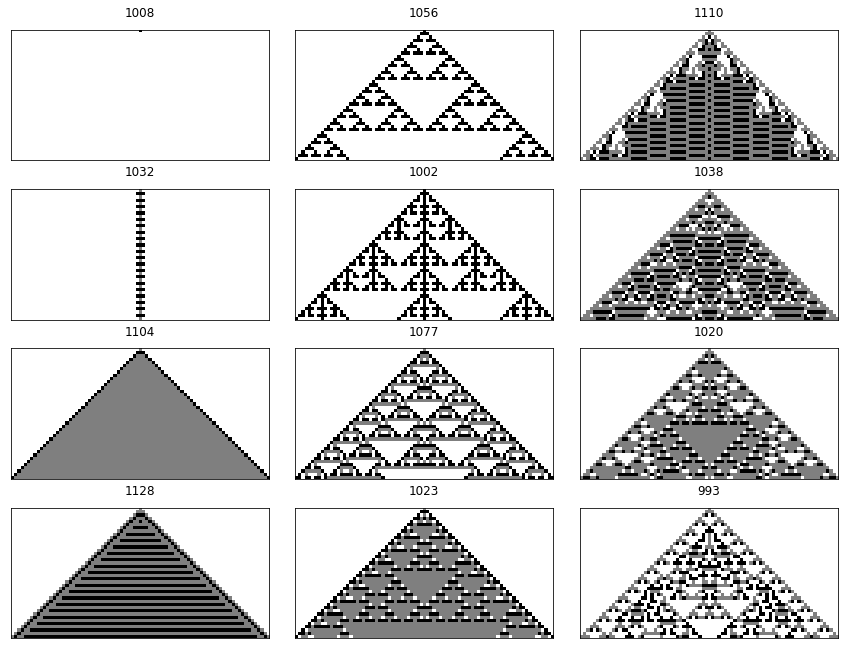

In [37]:
rules = [1008, 1032, 1104, 1128, 1056, 1002, 1077, 1023, 1110, 1038, 1020, 993]
fig, ax = plt.subplots(4, 3)
fig.set_size_inches(12, 9)
for i, rule in enumerate(rules):
    plot_evolution(evolve(TotalisticTernaryRule(rule), s0, T), ax[i % 4, i // 4])
    ax[i % 4, i // 4].set_title(str(rule))
plt.tight_layout()

Vejamos esses mesmos autômatos com um estado inicial aleatório com probabilidade de $1/3$ para cada estado das células.

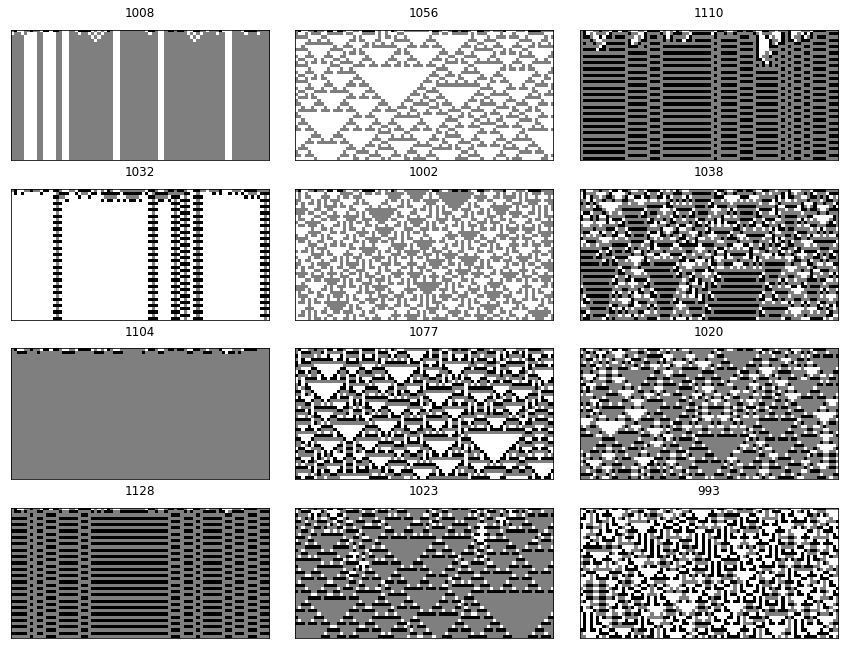

In [38]:
s0 = init_ternary_random(n)
fig, ax = plt.subplots(4, 3)
fig.set_size_inches(12, 9)
for i, rule in enumerate(rules):
    plot_evolution(evolve(TotalisticTernaryRule(rule), s0, T), ax[i % 4, i // 4])
    ax[i % 4, i // 4].set_title(str(rule))
plt.tight_layout()

Agora veja a seguinte evolução para o autômato 1329:

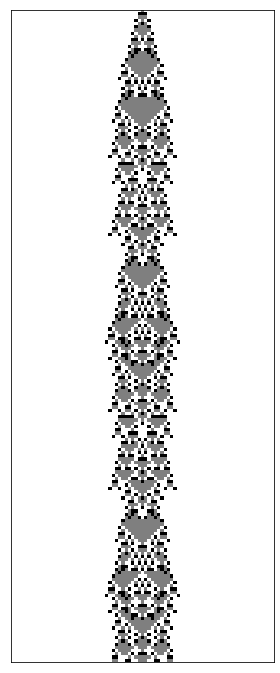

In [39]:
fig, ax = plt.subplots()
plot_evolution(evolve(TotalisticTernaryRule(1329), init_ternary_perturbation(81), 200), ax)
fig.set_size_inches(8, 12)

Note como a perturbação inicial começa a se espalhar, parecendo que vai ocupar todo o espaço de estado, para depois começar a diminuir, mas sem chegar a se extinguir, pois depois começa novamente a crescer, alteranndo períodos de crescimento de diminuição, num padrão intrincado.

Agora vamos ver o que acontece com a regra 1635.

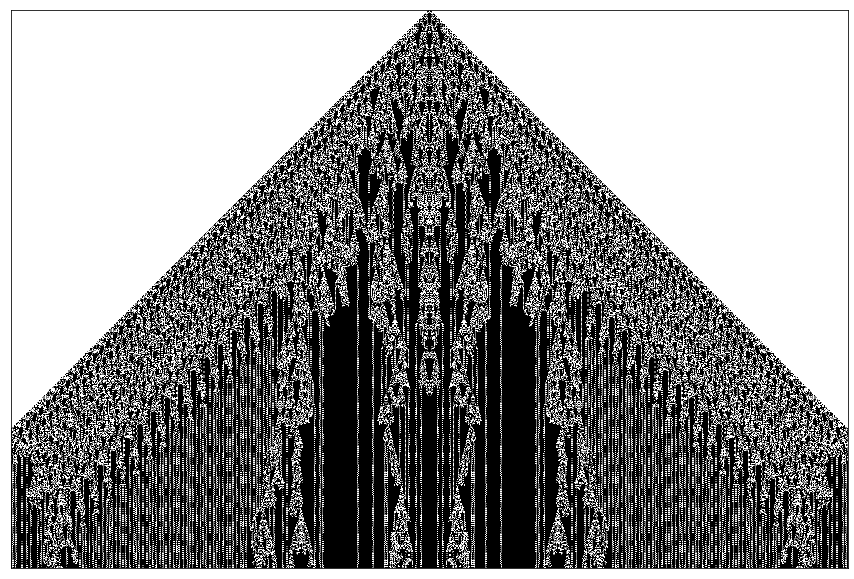

In [40]:
fig, ax = plt.subplots()
plot_evolution(evolve(TotalisticTernaryRule(1635), init_ternary_perturbation(3001), 2000), ax)
fig.set_size_inches(15, 20)

## Espaço bidimensional

Uma outra generalização diferente consiste em usar um espaço bidimensional, ao invés de um espaço unidimensional, como até aqui.

Neste caso, uma célula é identificada por um par de índice $(i,j)$ e precisamos especificar a vizinhança. Existem duas vizinhanças normalemente utilizadas:
- **Vizinhança 4:** A célula $(i,j)$ é vizinha das células $(i-1,j), (i+1,j), (i, j-1), (i, j+1)$.
- **Vizinhança 8:** Neste caso, além das 4 células da vizinhança 4, também são vizinhas as células $(i-1,j-1), (i-1,j+1),(i+1,j-1), (i+1,j+1)$.

No caso da vizinhança 4, o estado de 5 células precisa ser considerado. Com cada célula tendo 2 estados, teremos $2^5=32$ linhas na tabela, para um total de $2^{32}=4\,294\,967\,296$ regras distintas.

Considerando apenas regras totalísticas, temos 6 valores distintos, de 0 a 5, e portanto $2^6=64$ regras.

No caso da vizinhança 8 temos 9 células e $2^9=512$ linhas na tabela, com $2^{512}\approx 1.34\cdot10^{154}$ autômatos distintos!

Considerando apenas autômatos totalísticos temos 10 valores distintos, e portanto $2^{10}=1024$ autômatos.

Analisar a evolução desses autômatos de mais de uma dimensão é mais difícil, não só pelo número de autômatos distintos mas também pela dificuldade de visualização da evolução. No caso de autômatos 2D podemos plotar instantes distintos da evolução, ou então realizar uma animação.

As condições de contorno devem ser fornecidas em todas as direções, de acordo com a vizinhança. Para condições periódicas que estamos usando, isso signfica que a primeira linha e última linha são vizinhas, e a primeira e a última coluna também são vizinhas. No caso de vizinhança 8, devemos também acrescentar vizinhança entre elementos de pontas opostas.
Para facilitar lidar com condições de contorno, é comum acrescentar novas linhas e colunas nas beiradas, copiando os dados das linhas e colunas opostas.

In [41]:
class TotalisticRule2D(TotalisticRule):
    def __init__(self, rule_number, neigh_rows, neigh_cols):
        TotalisticRule.__init__(self, rule_number, ncells=neigh_rows.size)
        self.neigh_rows = neigh_rows
        self.neigh_cols = neigh_cols

In [42]:
class Totalistic4NeighbourhoodRule(TotalisticRule2D):
    def __init__(self, rule_number):
        TotalisticRule2D.__init__(self, rule_number, 
                 neigh_rows = np.array([ 0,  0, 0, -1, +1]), 
                 neigh_cols = np.array([-1, +1, 0,  0,  0]))

In [43]:
def update_ghost_cells_2d(matrix):
    matrix[ 0,  :] = matrix[-2,  :] # First line
    matrix[-1,  :] = matrix[ 1,  :] # Last line
    matrix[ :,  0] = matrix[ :, -2] # First column
    matrix[ :, -1] = matrix[ :,  1] # Last column
    # The following are needed only for 8-neighbourhood
    # But they don't hurt for 4-neighbourhood
    matrix[ 0,  0] = matrix[-2, -2] # Top left corner
    matrix[ 0, -1] = matrix[-2,  1] # Top right corner
    matrix[-1,  0] = matrix[ 1, -2] # Bottom left corner
    matrix[-1, -1] = matrix[ 1,  1] # Bottom right corner

In [44]:
def evolve_2d(rule, init, T):
    """Evolves the 2D automaton given by rule from the initial condition init for T time steps."""
    nrow, ncol = init.shape
    # Create an evolution array with ghost cells in the borders.
    evolution = np.zeros((T+1, nrow + 2, ncol + 2), dtype=np.int)
    # Copy initial conditions in the middle of the evolution array.
    evolution[0, 1:-1, 1:-1] = init
    for t in range(T):
        update_ghost_cells_2d(evolution[t, :, :])
        # Compute new cell values in the middle
        for i in range(1, nrow + 1):
            for j in range(1, ncol + 1):
                evolution[t+1, i, j] = rule.next_state(evolution[t, i + rule.neigh_rows, j + rule.neigh_cols])
    return evolution[:, 1:-1, 1:-1]

Plotando instantes distintos da evolução um ao lado do outro:

In [45]:
def plot_times_2d_evolution(evolution, nstates=2):
    """Plots the evolution as a set of time snapshots."""
    ntimes, nrows, ncols = evolution.shape
    nfigrows = int(np.ceil(ntimes / 4))
    fig, ax = plt.subplots(nfigrows, 4)
    fig.set_size_inches(16, nfigrows*4)
    for t in range(ntimes):
        ax[t // 4, t % 4].matshow(evolution[t, :, :], cmap='binary', vmin=0, vmax=nstates-1)
        ax[t // 4, t % 4].set_aspect('equal')
        ax[t // 4, t % 4].set_xticks([])
        ax[t // 4, t % 4].set_yticks([])
        ax[t // 4, t % 4].set_title(f'$t={t}$')

In [46]:
s0 = np.zeros((21, 21), dtype=np.int)
s0[10, 10] = 1

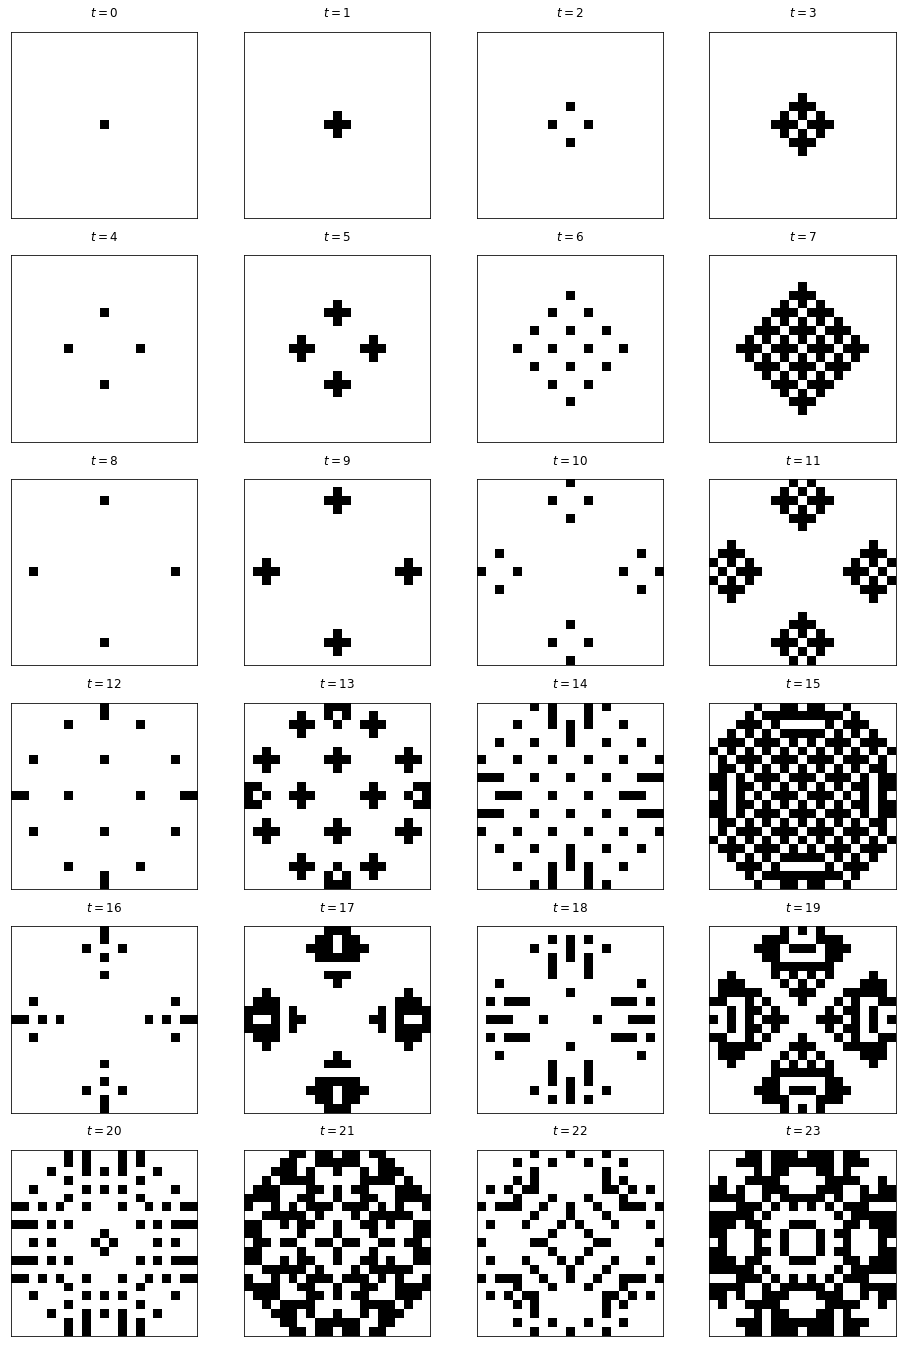

In [47]:
plot_times_2d_evolution(evolve_2d(Totalistic4NeighbourhoodRule(10), s0, 23))

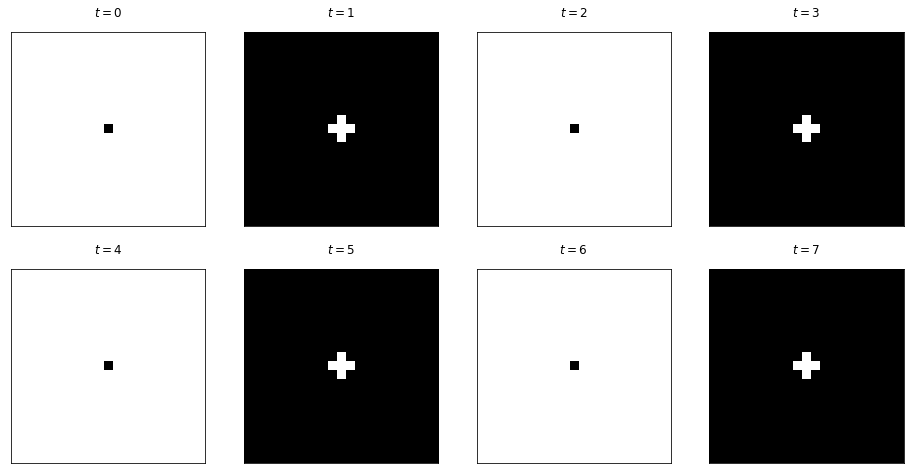

In [48]:
plot_times_2d_evolution(evolve_2d(Totalistic4NeighbourhoodRule(1), s0, 7))

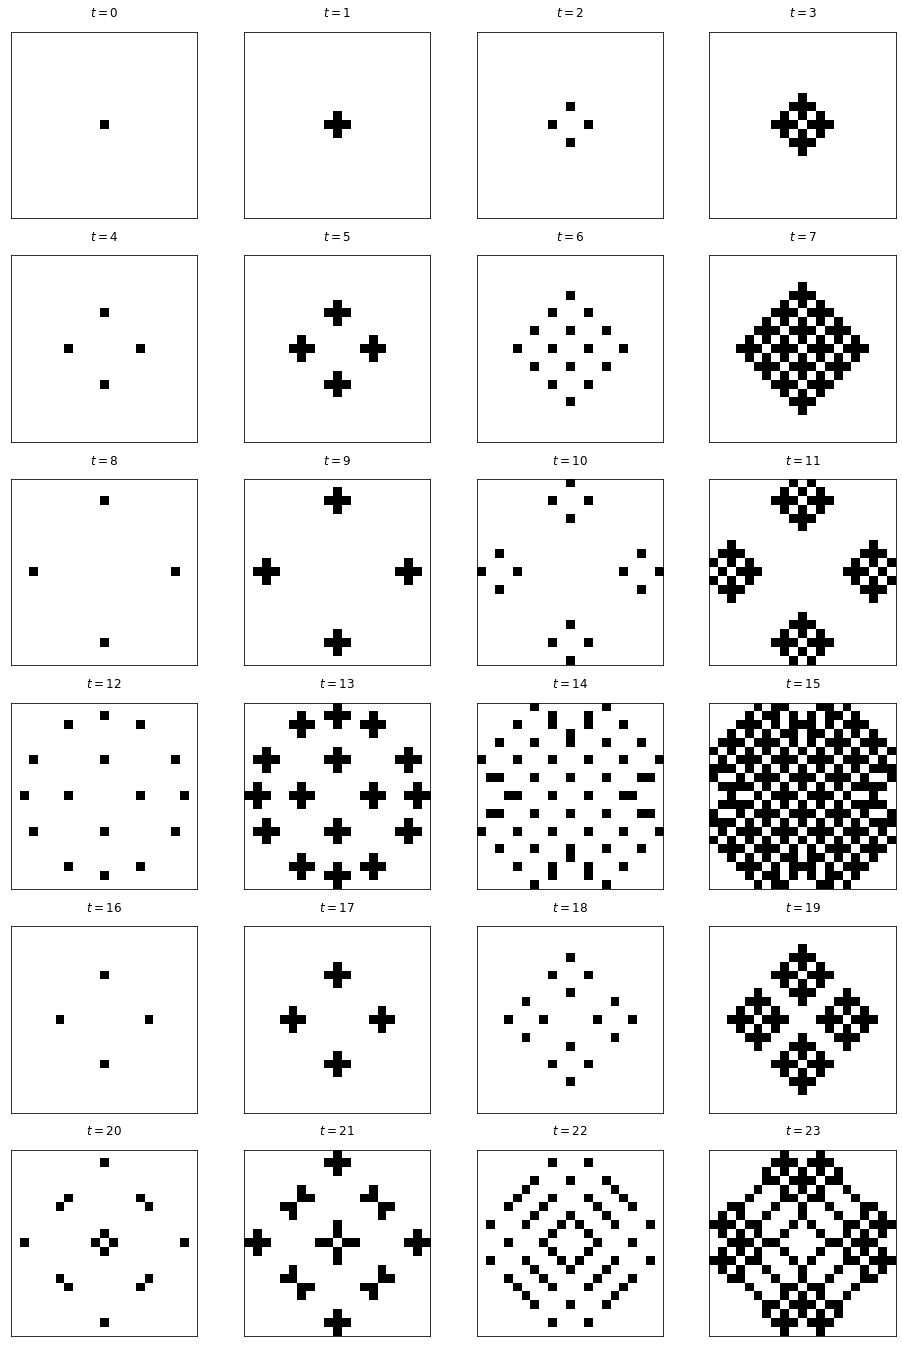

In [49]:
plot_times_2d_evolution(evolve_2d(Totalistic4NeighbourhoodRule(2), s0, 23))

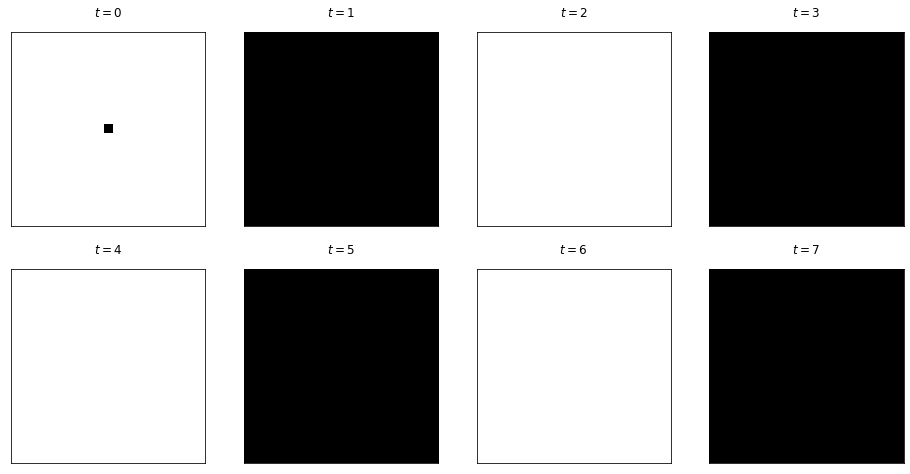

In [50]:
plot_times_2d_evolution(evolve_2d(Totalistic4NeighbourhoodRule(3), s0, 7))

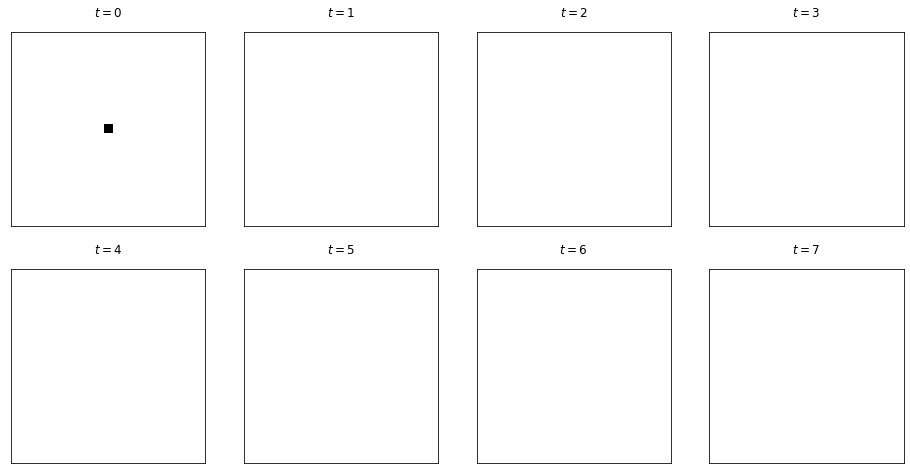

In [51]:
plot_times_2d_evolution(evolve_2d(Totalistic4NeighbourhoodRule(4), s0, 7))

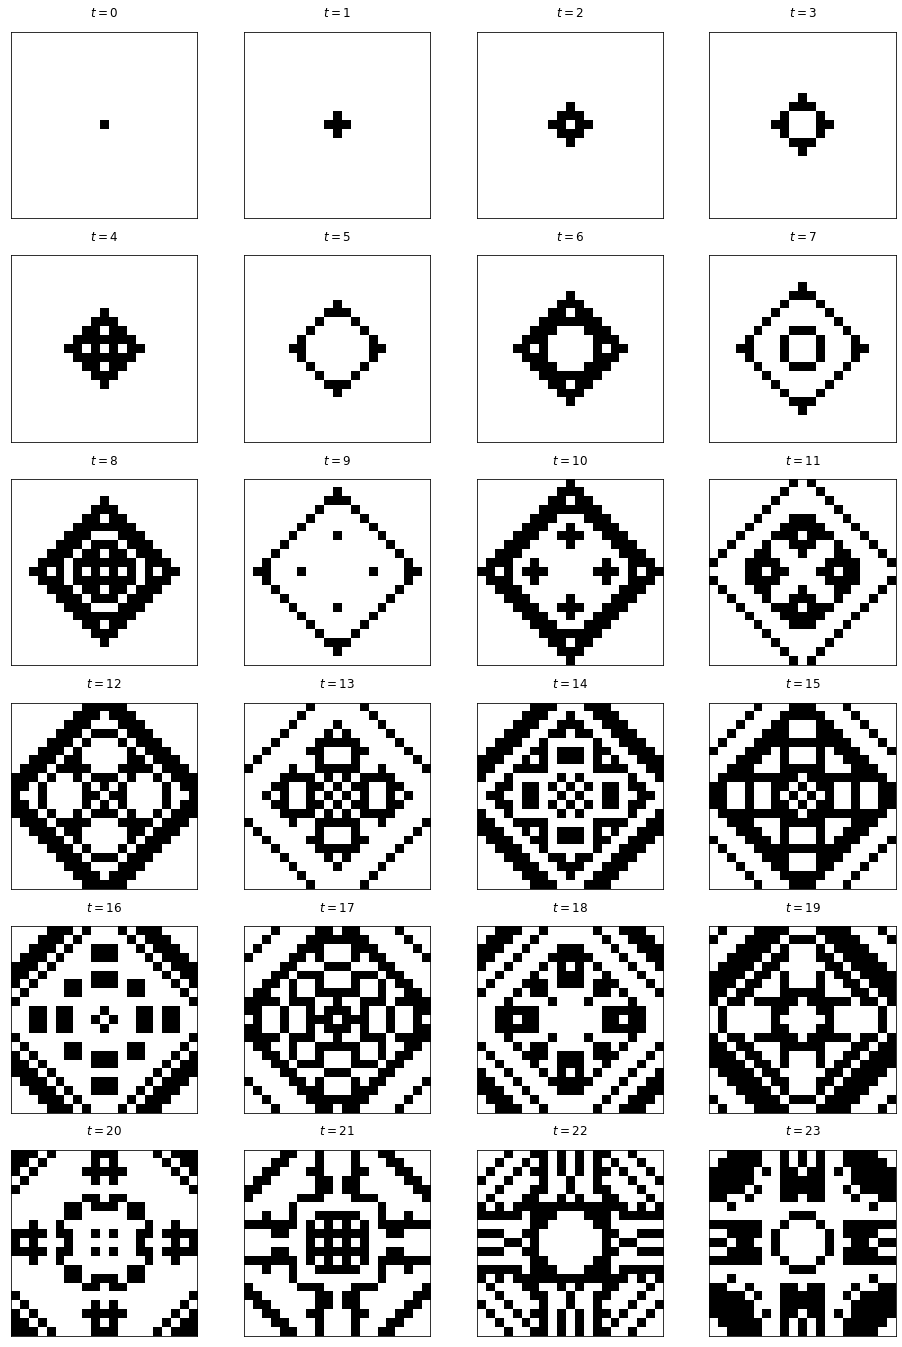

In [52]:
plot_times_2d_evolution(evolve_2d(Totalistic4NeighbourhoodRule(6), s0, 23))

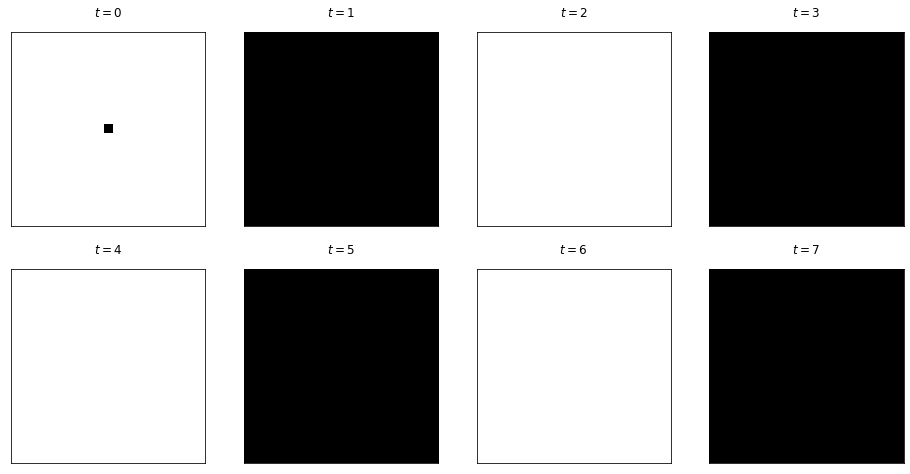

In [53]:
plot_times_2d_evolution(evolve_2d(Totalistic4NeighbourhoodRule(7), s0, 7))

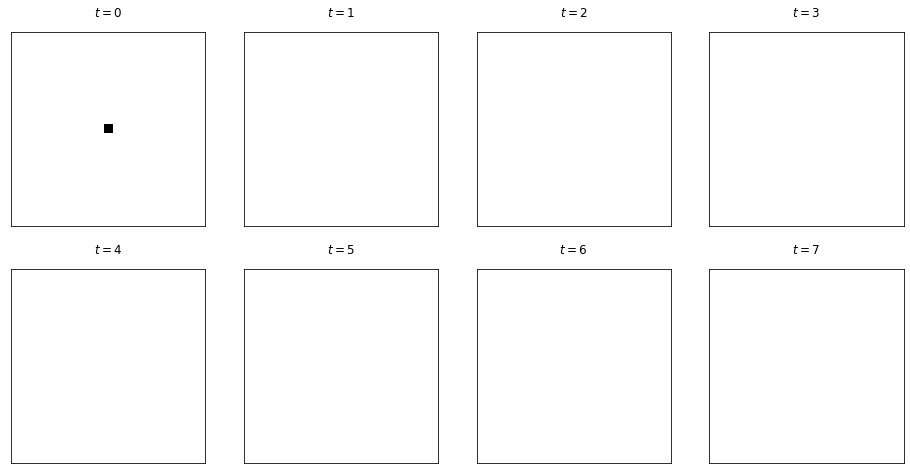

In [54]:
plot_times_2d_evolution(evolve_2d(Totalistic4NeighbourhoodRule(8), s0, 7))

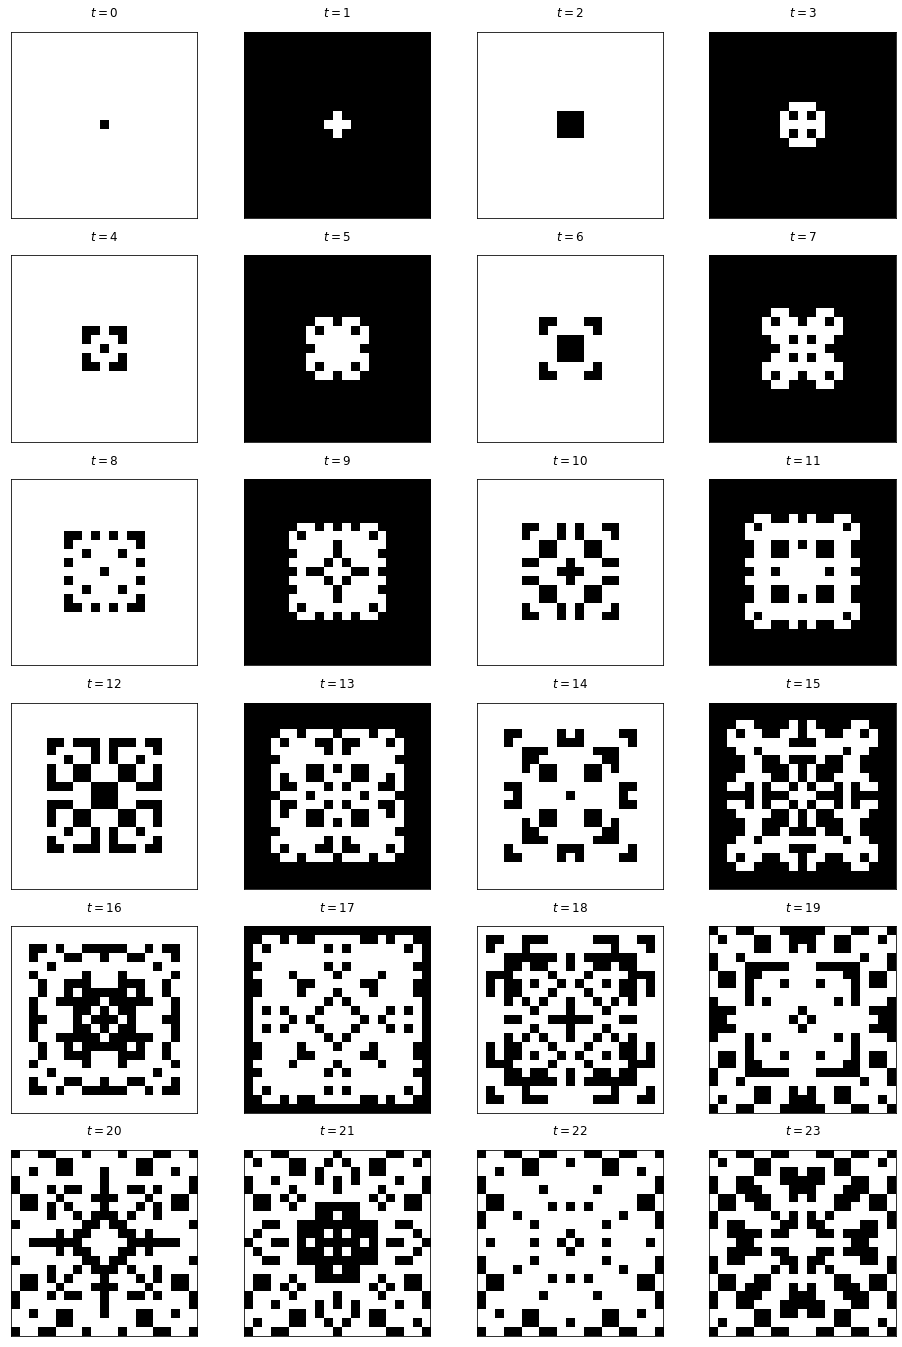

In [55]:
plot_times_2d_evolution(evolve_2d(Totalistic4NeighbourhoodRule(9), s0, 23))

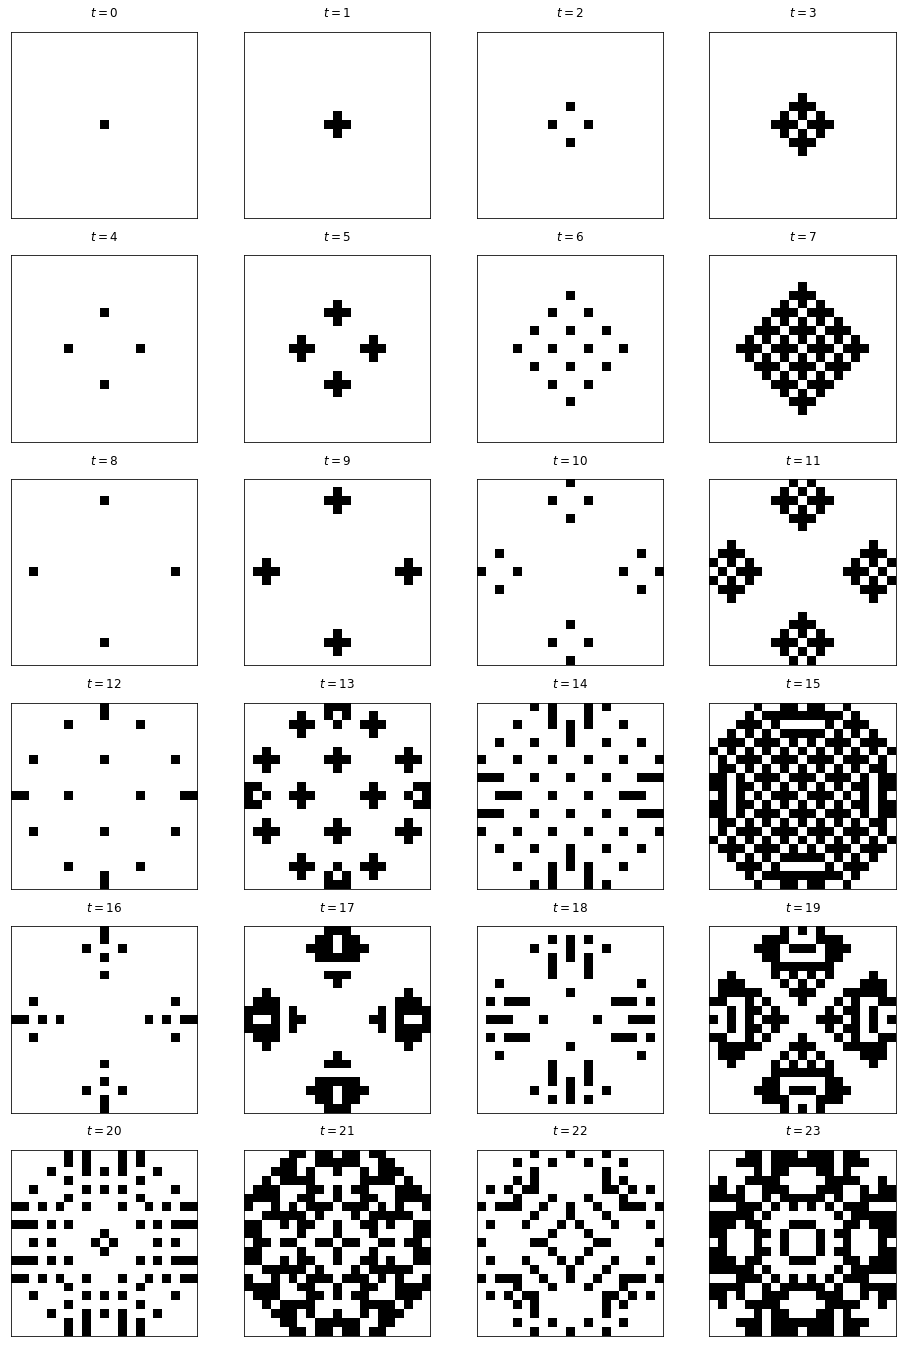

In [56]:
plot_times_2d_evolution(evolve_2d(Totalistic4NeighbourhoodRule(10), s0, 23))

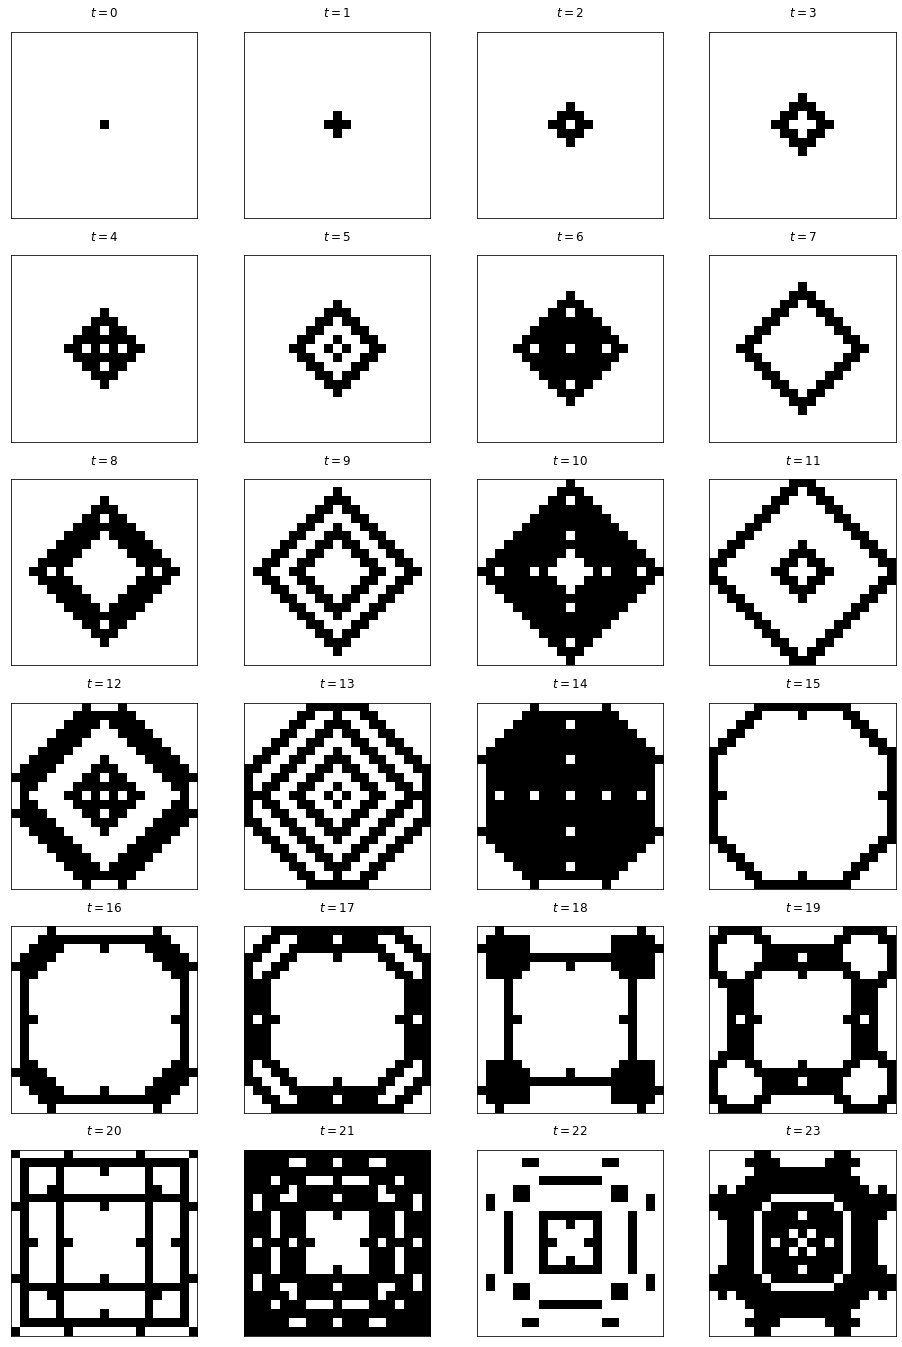

In [57]:
plot_times_2d_evolution(evolve_2d(Totalistic4NeighbourhoodRule(14), s0, 23))

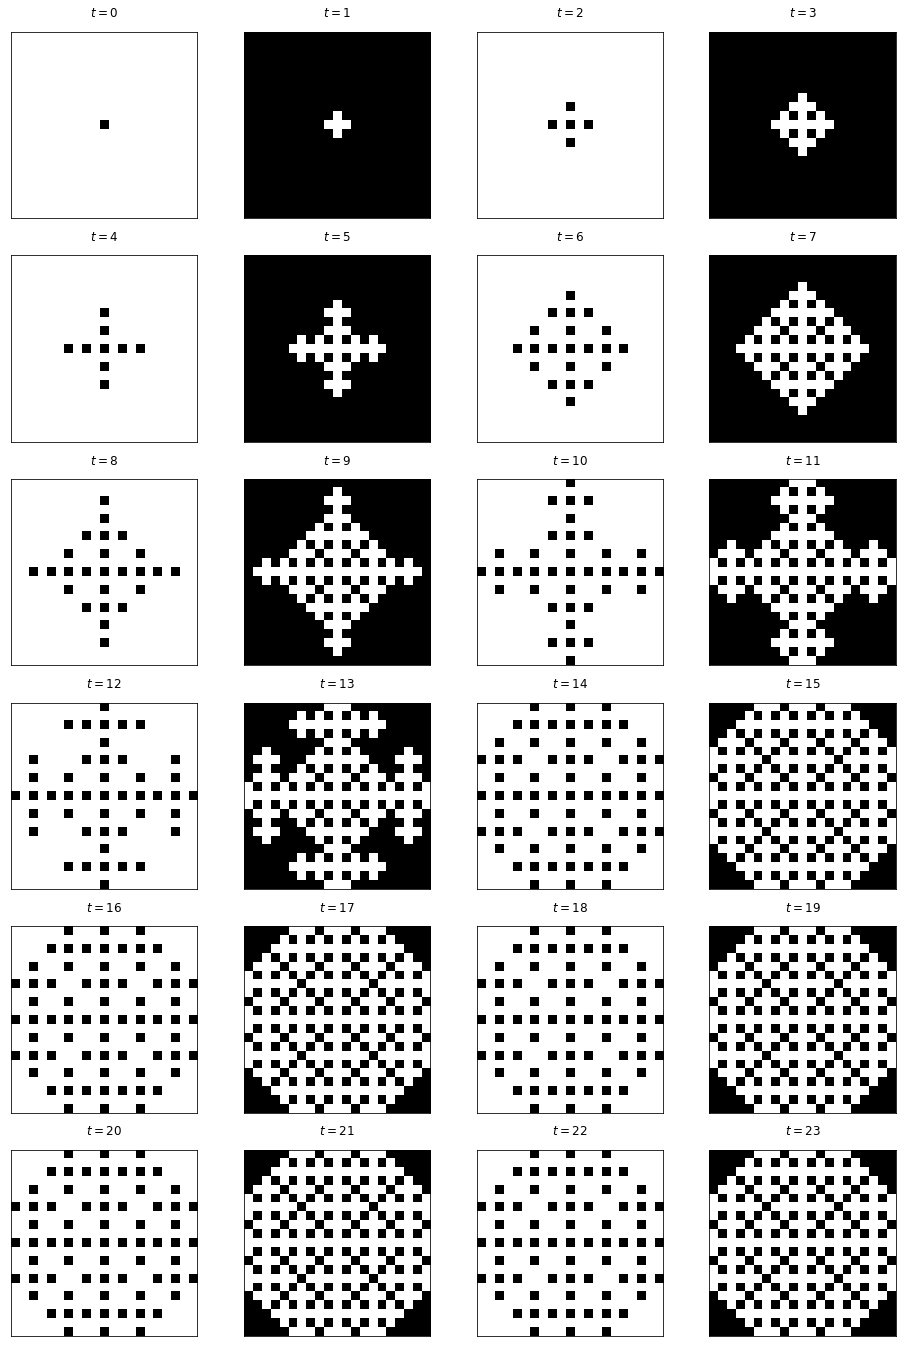

In [58]:
plot_times_2d_evolution(evolve_2d(Totalistic4NeighbourhoodRule(17), s0, 23))

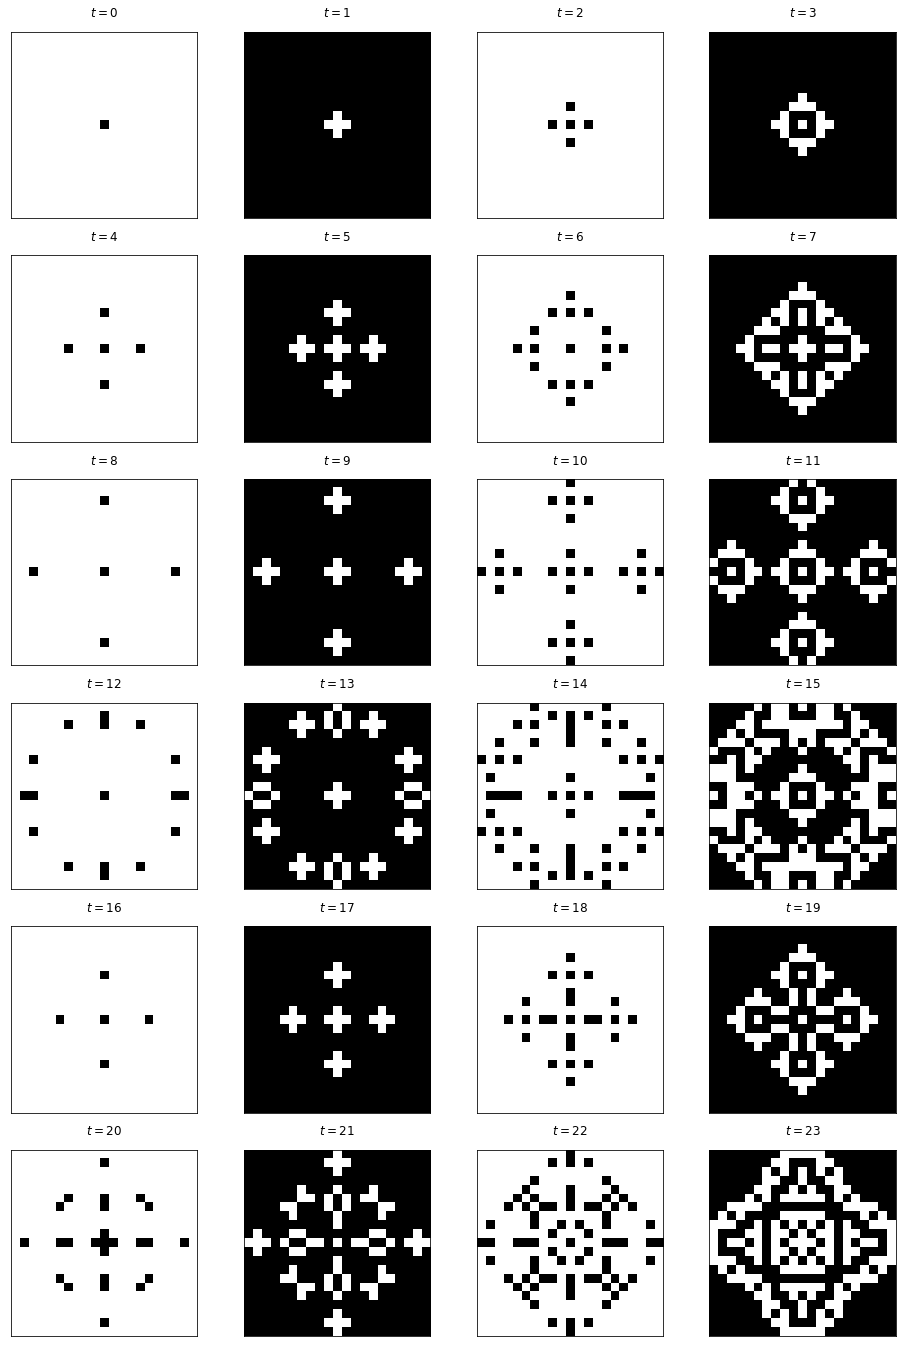

In [59]:
plot_times_2d_evolution(evolve_2d(Totalistic4NeighbourhoodRule(21), s0, 23))

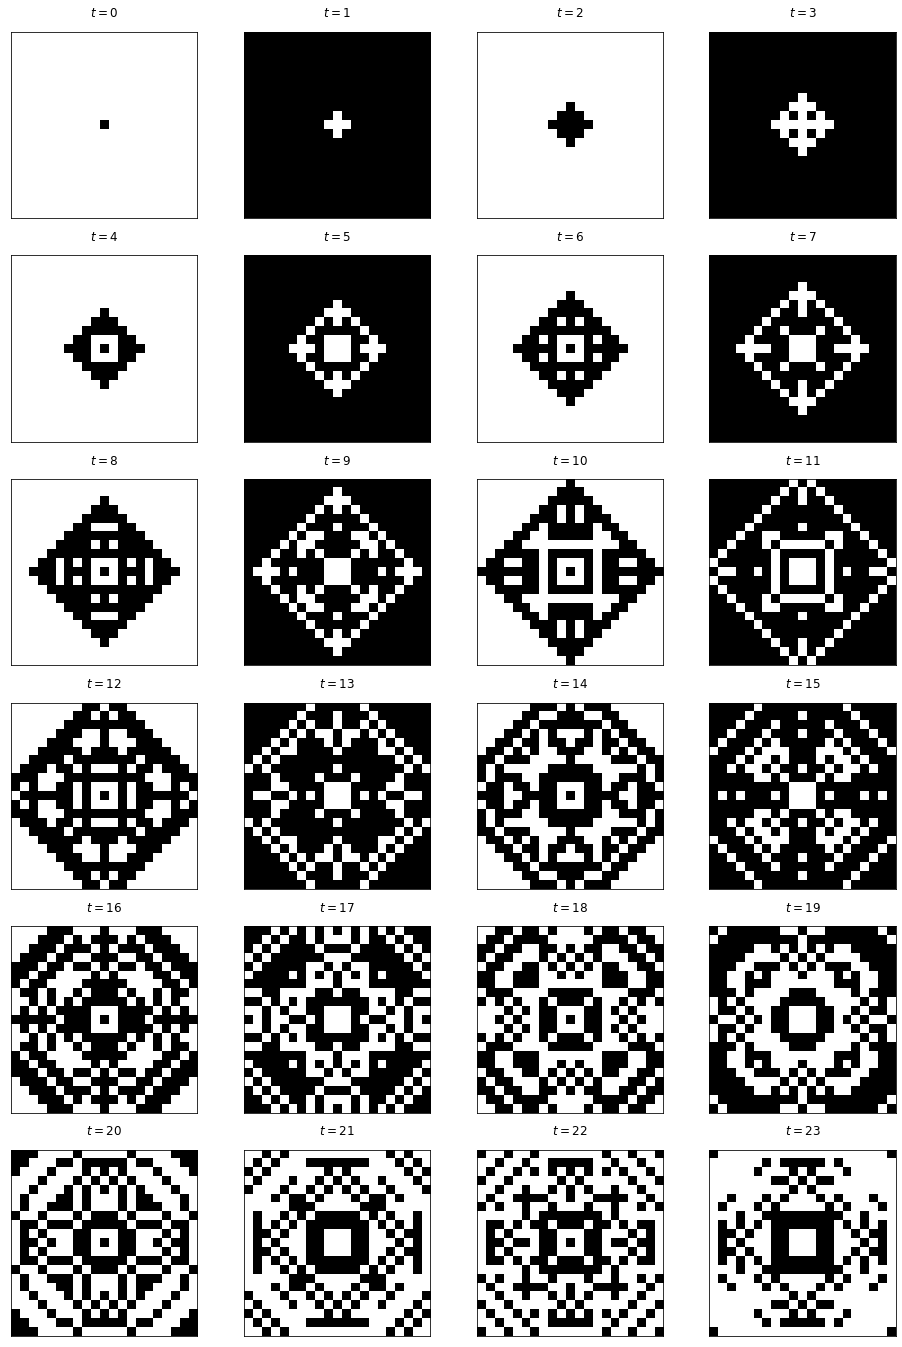

In [60]:
plot_times_2d_evolution(evolve_2d(Totalistic4NeighbourhoodRule(25), s0, 23))

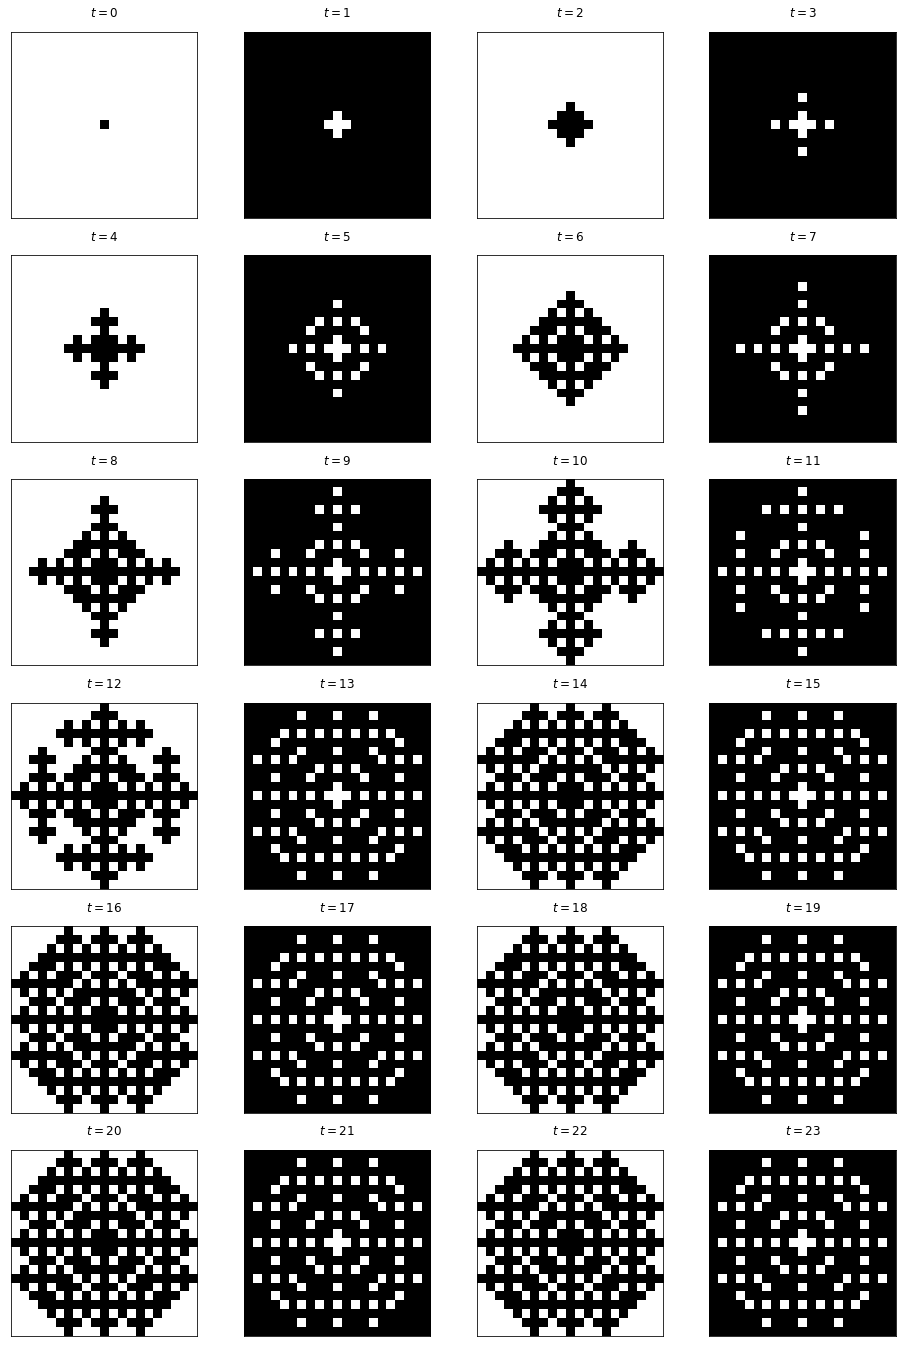

In [61]:
plot_times_2d_evolution(evolve_2d(Totalistic4NeighbourhoodRule(29), s0, 23))

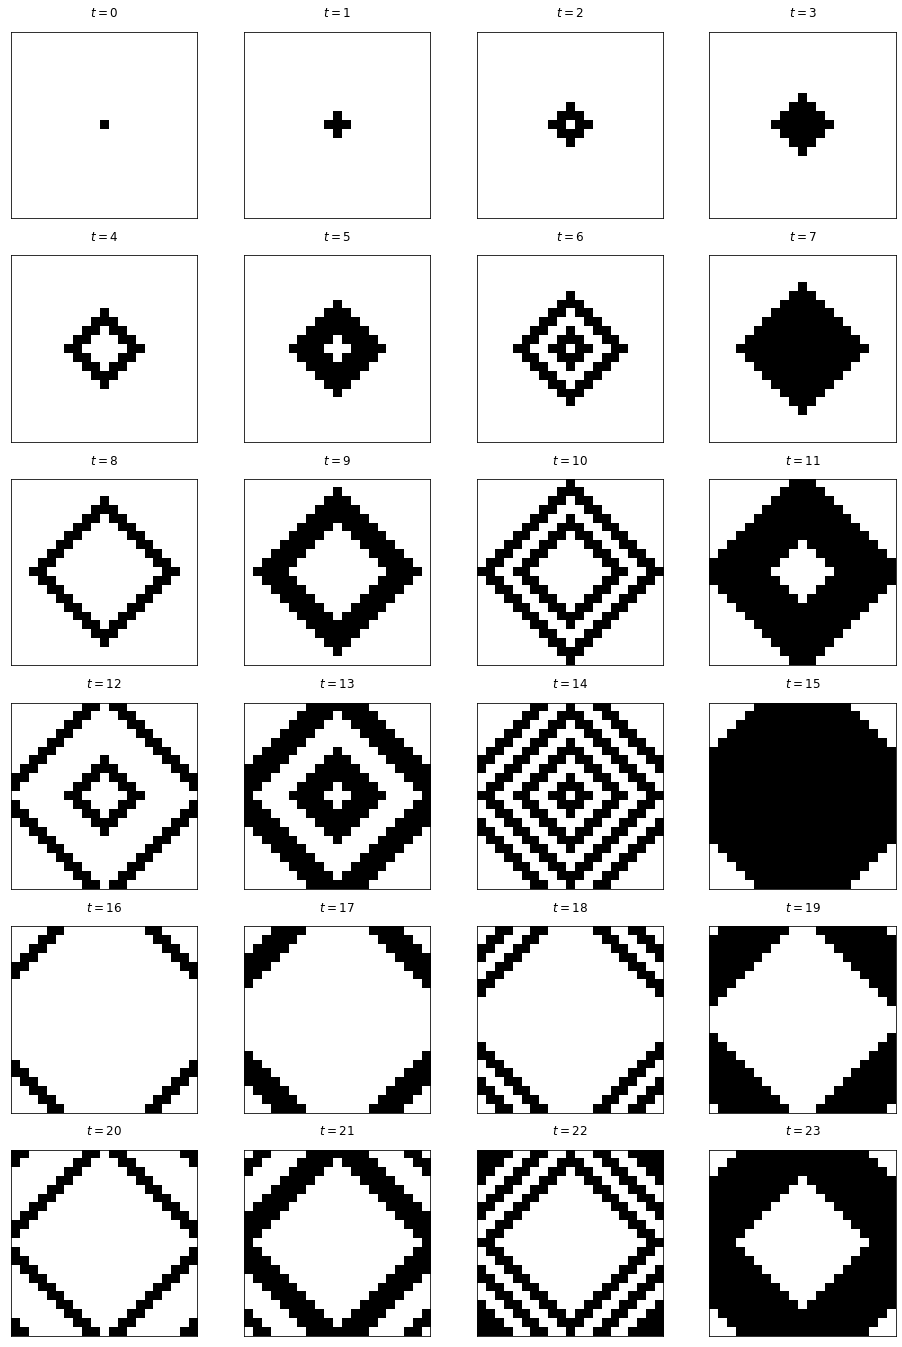

In [62]:
plot_times_2d_evolution(evolve_2d(Totalistic4NeighbourhoodRule(30), s0, 23))

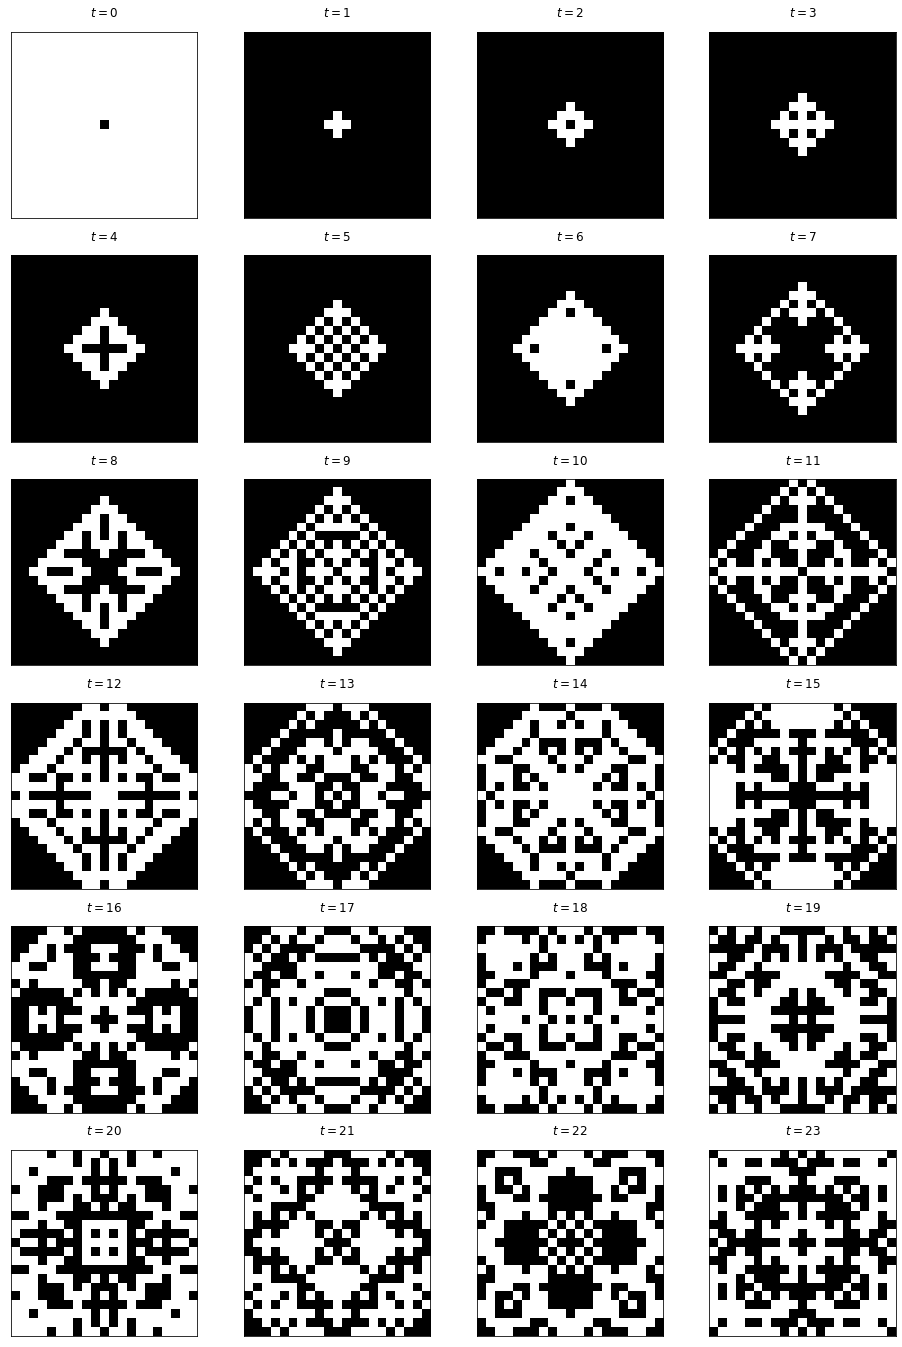

In [63]:
plot_times_2d_evolution(evolve_2d(Totalistic4NeighbourhoodRule(37), s0, 23))

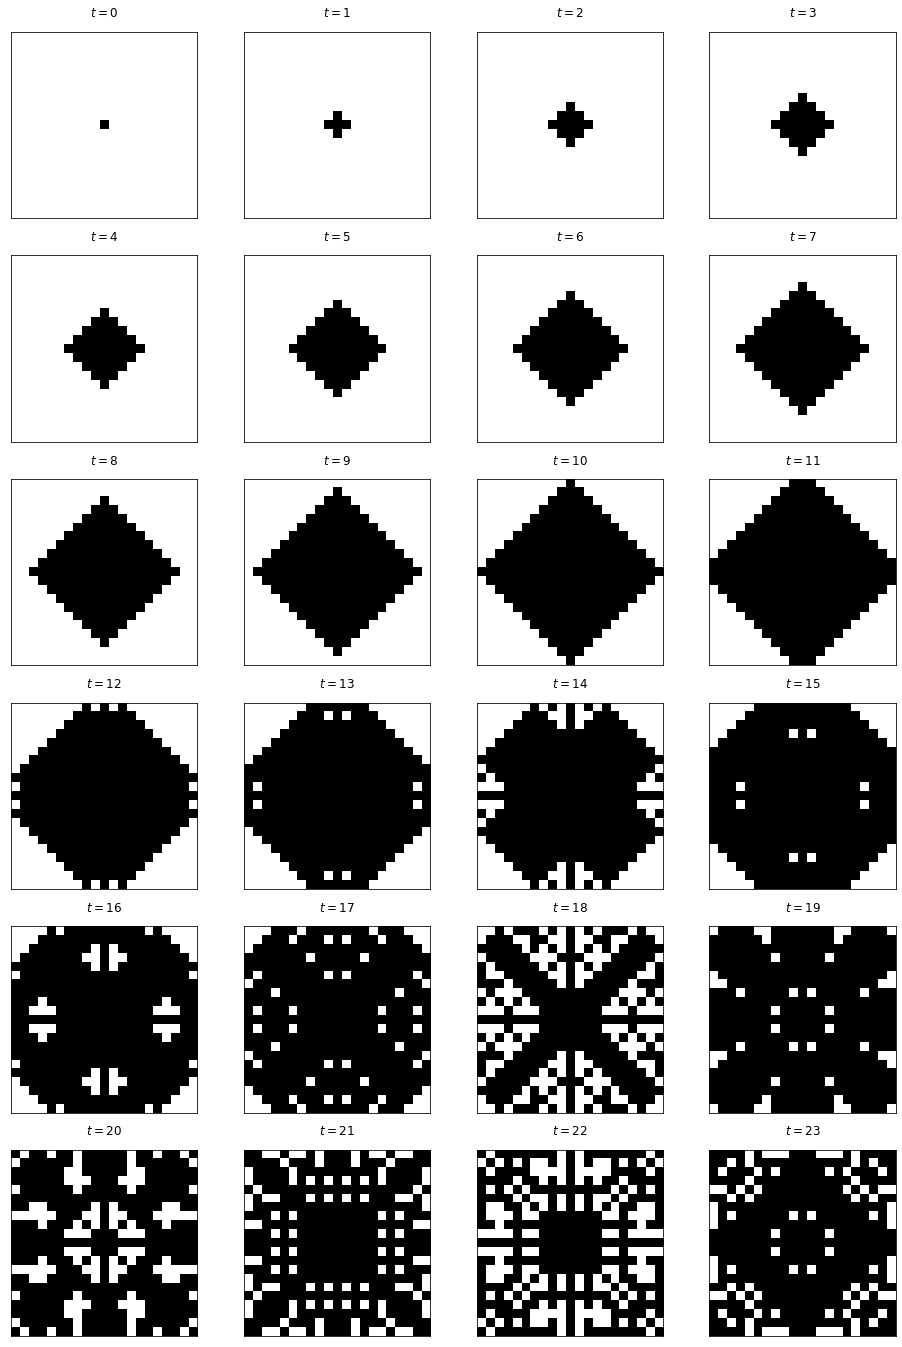

In [64]:
plot_times_2d_evolution(evolve_2d(Totalistic4NeighbourhoodRule(46), s0, 23))

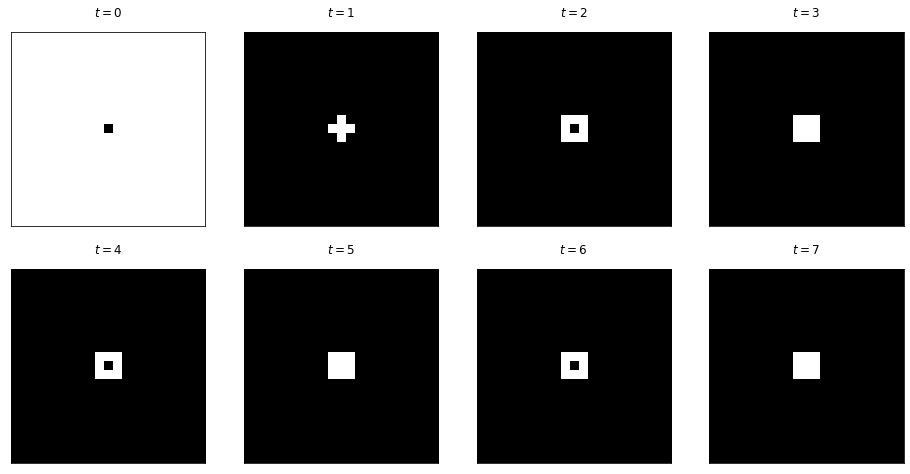

In [65]:
plot_times_2d_evolution(evolve_2d(Totalistic4NeighbourhoodRule(49), s0, 7))

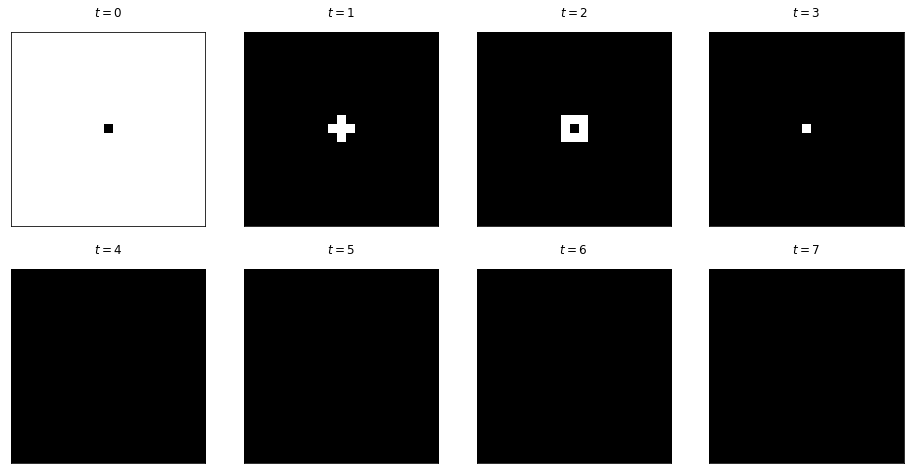

In [66]:
plot_times_2d_evolution(evolve_2d(Totalistic4NeighbourhoodRule(53), s0, 7))

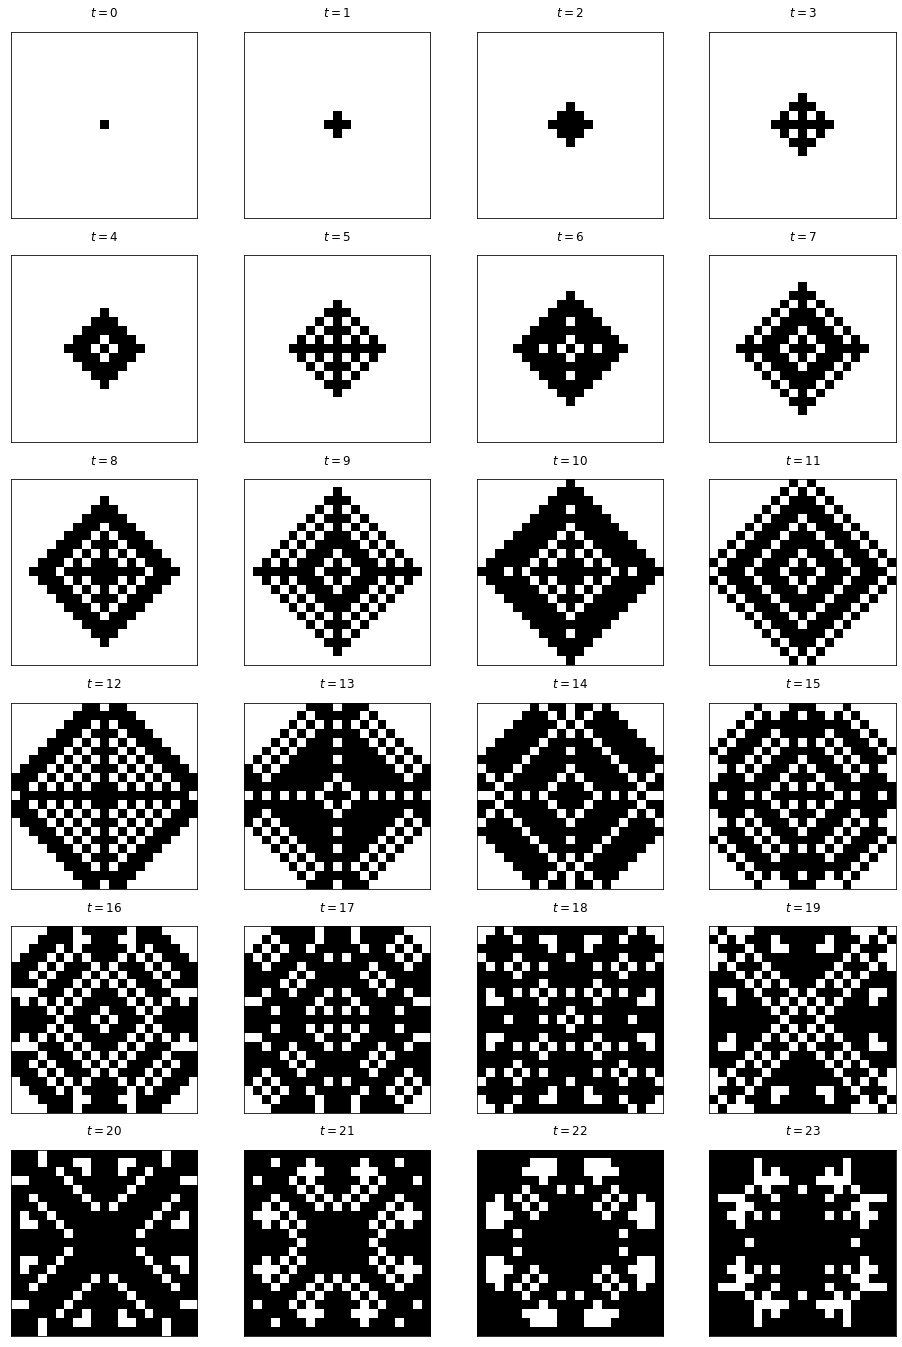

In [67]:
plot_times_2d_evolution(evolve_2d(Totalistic4NeighbourhoodRule(54), s0, 23))

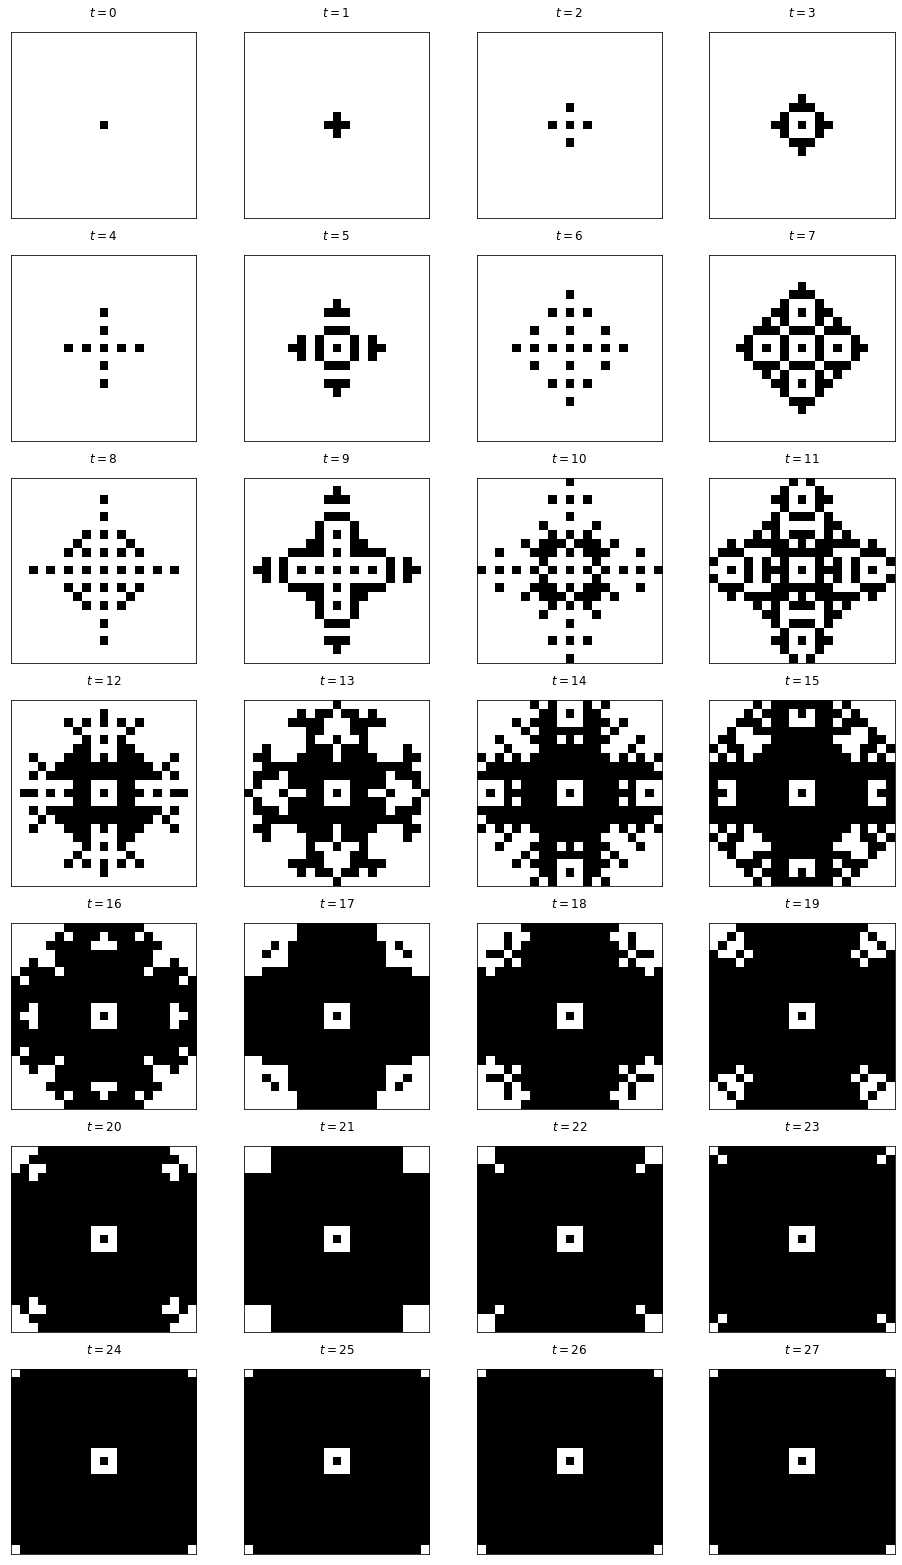

In [68]:
plot_times_2d_evolution(evolve_2d(Totalistic4NeighbourhoodRule(58), s0, 27))

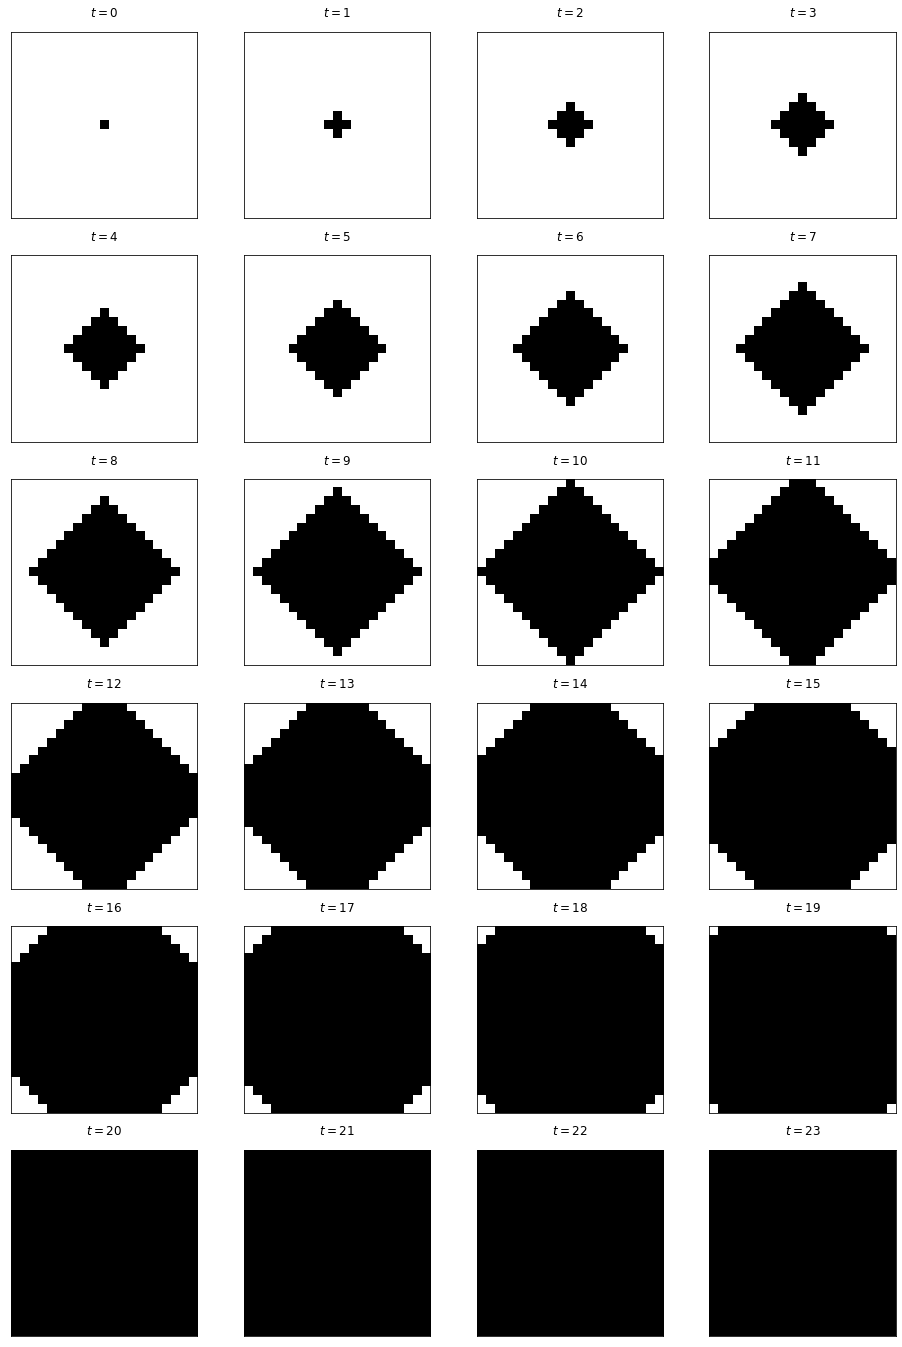

In [69]:
plot_times_2d_evolution(evolve_2d(Totalistic4NeighbourhoodRule(62), s0, 23))

In [70]:
import matplotlib.animation as animation
from IPython.display import HTML

In [71]:
def animate_2d_evolution(evolution, nstates=2, figsize=(6, 6)):
    """Generates an animation for the given 2d evolution.
    You should keep the returned object."""
    # Define an update function
    def update_time(t, evolution, ax):
        ax.matshow(evolution[t, :, :], cmap='binary', vmin=0, vmax=nstates-1)
        ax.set_xticks([])
        ax.set_yticks([])
        ax.set_aspect('equal')
    # Create the figure with the first frame
    fig, ax = plt.subplots()
    fig.set_size_inches(*figsize)
    # Create the animagion
    anim = animation.FuncAnimation(fig, update_time, evolution.shape[0], fargs=(evolution,ax))
    plt.close()
    return anim

In [72]:
anim1 = animate_2d_evolution(evolve_2d(Totalistic4NeighbourhoodRule(10), s0, 50))
HTML(anim1.to_jshtml())

In [73]:
anim1 = animate_2d_evolution(evolve_2d(Totalistic4NeighbourhoodRule(14), s0, 50))
HTML(anim1.to_jshtml())

In [74]:
anim1 = animate_2d_evolution(evolve_2d(Totalistic4NeighbourhoodRule(25), s0, 50))
HTML(anim1.to_jshtml())

In [75]:
anim1 = animate_2d_evolution(evolve_2d(Totalistic4NeighbourhoodRule(37), s0, 50))
HTML(anim1.to_jshtml())

Para vizinhança 8 o código é similar.

In [76]:
class Totalistic8NeighbourhoodRule(TotalisticRule):
    def __init__(self, rule_code):
        TotalisticRule2D.__init__(self, rule_code, 
                                  neigh_rows=np.array([-1, -1, -1,  0,  0,  0, +1, +1, +1]), 
                                  neigh_cols=np.array([-1,  0, +1, -1,  0, +1, -1,  0, +1]))

In [77]:
anim1 = animate_2d_evolution(evolve_2d(Totalistic8NeighbourhoodRule(170), s0, 50))
HTML(anim1.to_jshtml())

## Jogo da Vida

Um automato celular bidimensional famoso é o assim chamado **Jogo da Vida** (*Game of Life*) proposto pelo recentemente falecido matemático Conway.

Ele consiste de um autômato celular bidimensional com dois estados por célula (denominados "vivo" e "morto") e vizinhança 8, com as seguintes regras:

- Uma célula viva com menos do que 2 vizinhos vivos morre (população muito baixa para sobrevivência).
- Uma célula viva com 2 ou 3 vizinhos vivos continua viva.
- Uma célula viva com mais do que 3 vizinhos vivos morre (superpopulação).
- Uma célula morta com exatamente 3 vizinhos vivos se torna viva (crescimento populacinal).
- Uma célula morta com número de vizinhos diferente de 3 fica morta

O jogo da vida apresenta diversos comportamentos interessantes. Inclusive, já foi provado que ele é Turing-completo, o que siginifica que não é possível prever o seu comportamento a não ser pela execução de suas regras (isso é verdade também, por exemplo, para o autômato elementar de regra 30).

In [78]:
class GameOfLife(Totalistic8NeighbourhoodRule):
    def __init__(self):
        # Game of Life uses an 8-neighbourhood, so we will reuse some code.
        # The rule code chosen will not be used (could be any).
        Totalistic8NeighbourhoodRule.__init__(self, 0)
        
    def next_state(self, s):
        current_state = s[4] # s[4] is the state of the cell. Others are neighbours
        total_live_neighbours = np.sum(s) - current_state # Sum only neighbours
        the_new_state = 0
        if current_state == 0:
            if total_live_neighbours == 3:
                the_new_state = 1
        else:
            if total_live_neighbours == 2 or total_live_neighbours == 3:
                the_new_state = 1
        return the_new_state

In [79]:
s0 = np.zeros((41, 41), dtype=np.int)
s0[20, 19:22] = 1
s0[19:22, 20] = 1
anim = animate_2d_evolution(evolve_2d(GameOfLife(), s0, 50))
HTML(anim.to_jshtml())

In [80]:
s0 = (np.random.random((81, 81)) < 0.3).astype(np.int)
anim = animate_2d_evolution(evolve_2d(GameOfLife(), s0, 100))
HTML(anim.to_jshtml())

## Autômatos probabilísticos

Uma outra generalização é usar regras probabilísticas, ao invés de determinísticas: Isto é, o novo estado será escolhido aleatoriamente com certas probabilidades determinadas pelo estado da célula e de suas vizinhas.

Um caso simples seria um automato celular unidimensional totalístico binário com um vizinho de cada lado. Neste caso, como vimos o total tem 4 valores possíveis: 0, 1, 2 e 3. A cada valor desses, podemos associar uma probabilidade do novo estado ser 1.

| Total | probabilidade |
|-------|---------------|
| 0 | $p_0$ |
| 1 | $p_1$ |
| 2 | $p_2$ |
| 3 | $p_3$ |


Não é possível realizar um estudo sistemático desse tipo de autômato, pois existem infinitos autômatos diferente. Automatos probabilísticos são em geral introduzidos na tentativa de modelar algum fenômeno específico.

## Exemplo de aplicação: Modelo de trafego com a regra elementar 184

Autômatos celulares têm também sido usados para modelar de forma simplificada certos sistemas reais. A idéia é tentar capturar comportamentos típicos de sistemas reais usando-se modelos o mais simples possíveis.

Lembremo-nos do comportamento da regra 184.

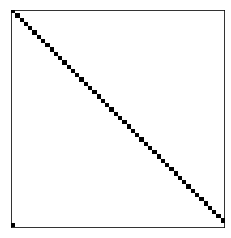

In [81]:
# Partindo de uma célula ligada à esquerda
s0 = np.zeros(50, dtype=np.int)
s0[0] = 1
plot_evolution(evolve(Rule(184), s0, 50))

Note como a célula ocupada vai se deslocando uma casa para a direita a cada passo de tempo. Se tivermos mais de uma célula, mas isoladas, isso irá acontecer independentemente para todas as células (lembre-se das condições de contorno periódicas).

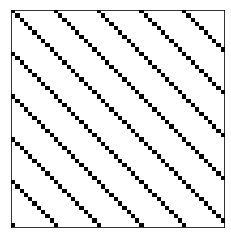

In [82]:
# Partindo de 5 células ligadas
s0 = np.zeros(50, dtype=np.int)
s0[[0, 10, 20, 30, 40]] = 1
plot_evolution(evolve(Rule(184), s0, 50))

Isso indica que podemos considerar esse modelo como representando veículos se deslocando para a direita com a mesma velocidade.

Vamos agora ver o que acontece se temos células consecutiva ocupadas (veículos sem espaço entre eles).

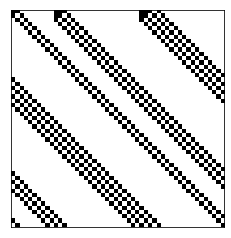

In [83]:
s0 = np.zeros(50, dtype=np.int)
s0[[0, 1, 10, 11, 12, 30, 31, 32, 32, 34]] = 1
plot_evolution(evolve(Rule(184), s0, 50))

Note como os veículos mais atrás nos conjuntos de veículos esperam que haja espaço antes deles para começar a andar, como no tráfego real. 

Vamos agora definir a *velocidade média* dos veículos no instante $t$ da seguinte forma: se o veículo $i$ conseguiu se deslocar para a direita no instante $t+1$, então contabilizamos a velocidade desse veículo como 1; se ele ficou parado, contabilizamos sua velocidade como 0. Fazemos então a média das velocidades de todos os veículos. Essa média estará entre 0 e 1.

Vejamos inicialmente o que acontece para diferentes densidade de veículos.

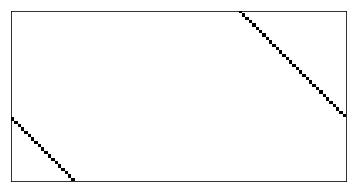

In [84]:
plot_evolution(evolve(Rule(184), init_random(100, 0.02), 50))

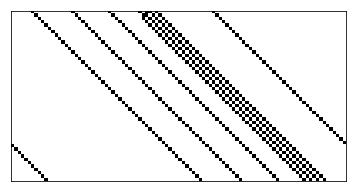

In [85]:
plot_evolution(evolve(Rule(184), init_random(100, 0.1), 50))

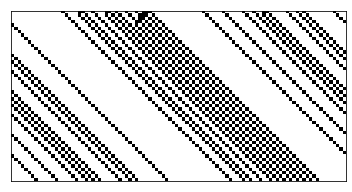

In [86]:
plot_evolution(evolve(Rule(184), init_random(100, 0.25), 50))

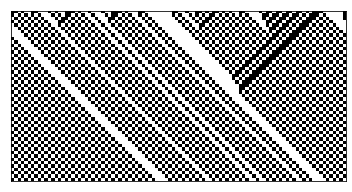

In [87]:
plot_evolution(evolve(Rule(184), init_random(100, 0.4), 50))

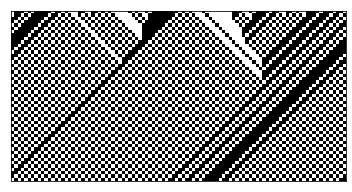

In [88]:
plot_evolution(evolve(Rule(184), init_random(100, 0.5), 50))

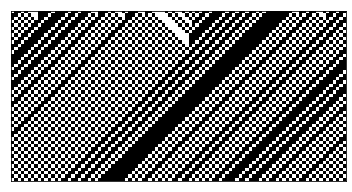

In [89]:
plot_evolution(evolve(Rule(184), init_random(100, 0.6), 50))

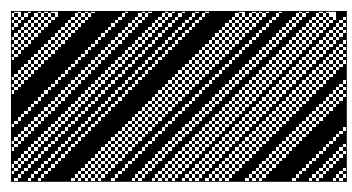

In [90]:
plot_evolution(evolve(Rule(184), init_random(100, 0.75), 50))

À medida que a densidade aumenta, aumenta a presença de grupos consecutivos de veículos, e como apenas o primeiro veículo de cada grupo consegue andar em cada instante, a velocidade média vai decaindo.

Vamos calcular numericamente a velocidade média de cada configuração contando o número de células ocupadas que são precedidade por uma célula livre (número de veículos que andam) e dividindo pelo número total de células ocupadas (número total de veículos).

In [91]:
def mean_velocities(evolution):
    """Compute the mean velocities of an evolution, for each time"""
    ntimes = evolution.shape[0]
    velocities = np.zeros(ntimes)
    next_cell = np.arange(1, evolution.shape[1]+1)
    next_cell[-1] = 0
    nvehicles = np.count_nonzero(evolution[0, :] == 1)
    for t in range(ntimes):
        cell_occupied = evolution[t, :] == 1
        next_cell_free = evolution[t, next_cell] == 0
        velocities[t] = np.count_nonzero(np.logical_and(cell_occupied, 
                                                        next_cell_free)) / nvehicles
    return velocities

Estamos interessados apenas na velocidade de equilíbrio (depois de as características especiais das condições iniciais forem estabilizadas), portanto simularemos por um certo número de intervalos de tempo, depois faremos uma média dos 10 últimos valores (que em geral são todos iguais).

Também, como as condições iniciais são aleatórias, se queremos saber como a velocidade depende da densidade de veículos, precisamos, para cada probabilidade, calcular várias condições iniciais e realizar médias e outras análises estatísticas.

In [92]:
ps = np.linspace(0.01, 1, 51) # 51 valores de p igualmente espaçados entre 0 e 1
n_repetitions = 10 # Vamos fazer 10 simulações para cada valor de p
n_cells = 400 # 200 cells
n_steps = 100 # Number of time steps
rule_184 = Rule(184) # Using this rule

average_velocities = np.zeros_like(ps)
std_dev_velocities = np.zeros_like(ps)
for i, p in enumerate(ps):
    vel_reps = np.zeros(n_repetitions)
    for rep in range(n_repetitions):
        s0 = init_random(n_cells, p)
        # Avoid having no vehicles!
        while np.count_nonzero(s0) == 0:
            s0 = init_random(n_cells, p)
        states = evolve(rule_184, s0, n_steps)
        vel = mean_velocities(states)
        vel_reps[rep] = np.mean(vel[-10:])
    average_velocities[i] = np.mean(vel_reps)
    std_dev_velocities[i] = np.std(vel_reps, ddof=1)

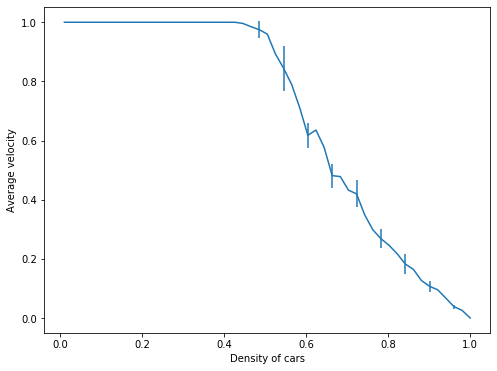

In [93]:
fig, ax = plt.subplots()
fig.set_size_inches(8, 6)
ax.errorbar(ps, average_velocities, std_dev_velocities, errorevery=3)
ax.set_xlabel('Density of cars')
ax.set_ylabel('Average velocity');

Como vemos, para densidade de veículos abaixo de 0.5 o tráfego é livre em geral, e os carros conseguem se deslocar à velocidade máxima, mas acima dessa densidade crítica temos uma transição de fase, e o sistema passa a estar congestionado, com a velocidade média decaindo à medida que a densidade de carros aumenta.

## Exercícios

### 1

Calcule as regras duais e simétricas das regras 28, 58, 118 e 124. Plote a evolução de dessas regras e suas duais e simétricas partindo de uma perturbação simples e do dual desse estado incial. Compare os resultados.

### 2

Desenvolva código para encontrar todas as regras que são duais delas mesma, e todas as regras que são simétricas delas memas.

### 3 (a entregar)

Leia na Internet sobre os seguintes padrões do Jogo da Vida (nomes em inglês para facilitar a busca):

- Block
- Bee hive
- Loaf
- Tube
- Blinker
- Toad
- Beacon
- Pulsar
- Pentadecathlon
- Glider
- Lightweight spaceship
- Middleweight spaceship
- Heavyweight spaceship
- Gosper glider gun

Execute simulações que contenham todos eles elementos (não necessariamente na mesma simuação) para verificar sua operação.